<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
Besmehi Taala
<p></p>
</font>
<p></p>
<font>
<br>
Moder Information Retrieval
<br>
Prof: Dr. Mahdieh Soleymani Baghshah 
</font>
<p></p>
<br>
<font>
<b>Phase 1&2</b>
</font>
<br>
<br>
Reza Soumi
<br>
<br>
<font>
Sharif University of Technology
<br>
Computer Engineering Department
<br>
<br>
</font>
</div>
</font>
</div>

<div>
<font face="XB Zar" size=4 >
Machine learning based systems use machine learning methods in different sectors. Classification and clustering are the two tasks required by these systems. In this exercise, we will implement these tasks with different methods and implement new capabilities for the retrieval system on scientific articles. You can get the data of this phase from
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">this link</a>
download.
</font>
</div>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import nltk
import pandas as pd
import numpy as np
from nltk import word_tokenize
import string
import ast
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
nltk.download('punkt')
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...



[nltk_data]   Package punkt is already up-to-date!



[nltk_data] Downloading package stopwords to /root/nltk_data...



[nltk_data]   Package stopwords is already up-to-date!


True

<div>
<font face="XB Zar" size=6>
    <h1>
    <b>Classification using NaiveBayes</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you will categorize documents. For this purpose, first for each document, create the vector related to the number of total words, and then implement the NaiveBaise classifier yourself from the base and classify the documents.
In this task, you can not use the entire dataset, but your dataset must include all three classes in the main dataset.
</font>
</div>

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Download Dataset</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, download the following dataset in kaggle and view its features.
</font>
</div>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/arxiv_data.csv')

In [ ]:
df.describe()

,titles,summaries,terms
count,51774,51774,51774
unique,38972,38979,3157
top,Transformers in Vision: A Survey,Astounding results from Transformer models on ...,['cs.CV']
freq,7,7,17369


In [ ]:
df = df.drop_duplicates(subset=['titles'])

In [ ]:
df.head(5)

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
print(df.isnull().sum())

titles       0



summaries    0



terms        0



dtype: int64


In [ ]:
topic_counts = df['terms'].value_counts()
print(topic_counts)

['cs.CV']                                          12747



['cs.LG', 'stat.ML']                                4074



['cs.LG']                                           2046



['cs.CV', 'cs.LG']                                  1486



['cs.LG', 'cs.AI']                                  1206



                                                   ...  



['cs.LG', 'cs.CL', 'cs.HC', 'stat.ML']                 1



['cs.LG', 'cs.AI', 'cs.CL', 'cs.PL', 'stat.ML']        1



['cs.LG', 'cs.CL', 'stat.ME', 'stat.ML']               1



['cs.LG', 'cs.CL', 'cs.LO', 'stat.ML']                 1



['stat.ML', 'cs.CV', 'cs.LG', 'q-bio.QM']              1



Name: terms, Length: 3157, dtype: int64


<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Dataset Size Reduction</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you can reduce the size of the dataset to your liking so that NaiveBayes can perform better. Reducing the size of the dataset can increase the speed and memory required.
</font>
</div>

<h2>Ways to do size reduction:</h2>
<p>1- Random Sampling</p>
<p>2- Stratified Sampling (Implemented Here)</p>
<p>3- Feature Selection (We do this in preprocessing)</p>
<p>4- Dimension Reduction (We do this in other methods, not in Naive Bayes)</p>
<p>5- Time-Based Sampling (There is no time-based data here)</p>
<p>It's crucial to strike a balance between reducing computational requirements and maintaining sufficient representativeness of the original dataset for accurate classification.</p>

<h2>Stratified Sampling</h2>
<p>1- Identify the Stratification Variable:</p><p> Determine the variable or characteristic in the dataset that we want to ensure is represented proportionally in the sample. This is class label here.
</p>
<p>2- Partition the Data:</p><p> Divide the dataset into mutually exclusive and exhaustive subsets based on the values of the stratification variable. Each subset represents a stratum. Dataset with three classes (A, B, and C) cause to create three strata—one for each class.
</p>
<p>3- Determine Sample Sizes:</p><p> Decide on the desired sample size or proportion for each stratum. We can allocate a fixed number of samples for each stratum or determine the proportion based on the size of each stratum relative to the entire dataset. (We can fine-tune this parameter)
</p>
<p>4- Sample from Each Stratum:</p><p> Randomly select samples from each stratum according to the determined sample sizes or proportions. The sampling is performed independently within each stratum.</p>


In [ ]:
df['terms'] = df['terms'].apply(lambda x: ast.literal_eval(x)[0] if len(x) > 0 else None) # Class Label -> first element of class list belongs to
topic_counts = df['terms'].value_counts()
print(topic_counts)

cs.CV      20478



cs.LG      15973



stat.ML     2521



Name: terms, dtype: int64


In [ ]:
df.describe()

,titles,summaries,terms
count,38972,38972,38972
unique,38972,38966,3
top,Survey on Semantic Stereo Matching / Semantic ...,Transformer is a powerful tool for many natura...,cs.CV
freq,1,2,20478


<h2>Prior Probability of each class</h2>
<p>Size reduction of dataset could change the total number of each class, So we want to calculate prior probability of each class here</p>
<p>Note: Weight of this prior will be the ratio of the log of each class, because sampling was correlated and we don't know at all!</p>
<p>But it barely reduce performance, it means sampling was not correlated and prior probability must follow from number of samples for each class against total samples</p>

In [ ]:
sampled_df = df.sample(n = len(df) // 4)
len(sampled_df)
downsampled_counts = sampled_df['terms'].value_counts()
print(downsampled_counts)

cs.CV      5130



cs.LG      3946



stat.ML     667



Name: terms, dtype: int64


<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Dataset Preprocessing</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you can pre-process the dataset using the following function or the functions you defined in phase 1.
The data you will work with in this section is multi-label. But for this section, we consider only the first tag of each article and look at the data as a single tag.
</font>
</div>

<p>1- First we will find domain stopwords based on corpus</p>
<p>2- Define preprocess text function to remove stopwords+domain_stopwords and convert to lowercase and remove punctuation</p>
<p>3- Covert data of the dataframe that means titles and summaries to normalized tokens</p>

In [ ]:
df_ct = pd.DataFrame()
df_ct['combined_text'] = sampled_df['titles'] + ' ' + sampled_df['summaries']

word_counter = Counter()
for text in df_ct['combined_text']:
    tokens = word_tokenize(text)
    word_counter.update(tokens)

num_stopwords = 20 # This parameter can be a learning parameter which shoulf be choose through K-fold CV

domain_stopwords = [word for word, count in word_counter.most_common(num_stopwords)]

print("Domain stopwords: ", domain_stopwords)

Domain stopwords:  ['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', ')', '(', 'we', 'with', 'learning', 'We', 'this', 'as']


In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, domain_stopwords=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in domain_stopwords]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

<h2>Feature Engineering</h2>
<p>Titles are more important than summaries, So we multiply the weights of words of the titles by 2 to have more attention to title</p>
<p>This weight coefficient can be a learning parameter, so we can consider some values for it, then each result by k-fold cross validation and choose the best weight</p>

In [ ]:
sampled_df['combined_text'] = (sampled_df['titles'] * 2) + sampled_df['summaries']

In [ ]:
sampled_df['combined_text'] = sampled_df['combined_text'].apply(lambda t: preprocess_text(t, minimum_length=1, stopword_removal=True, domain_stopwords=domain_stopwords, lower_case=True, punctuation_removal=True))

<div>
<font face="XB Zar" size=5>
    <h2>
    <b> Prepare train and test data</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you can prepare the data needed for NaiveBayes by creating the doc-word matrix. In this matrix, each row represents the ID of the document and each column represents a word in your entire vocabulary.
You can also use CountVectorizer.
</font>
</div>

In [ ]:
print(sampled_df['combined_text'])

41995    [towards, query-efficient, black-box, adversar...



46318    [generating, reliable, process, event, streams...



907      [multi-layer, approach, superpixel-based, high...



35686    [reinforcement, heterogeneous, teams, palo, bo...



1067     [structured, tree, potentials, crf, image, seg...



                               ...                        



3616     [dataset, evaluate, representations, learned, ...



31202    [patchmatch-rl, deep, mvs, pixelwise, depth, n...



14843    [framework, data-driven, solution, parameter, ...



49863    [novel, method, fuzzy, time, series, forecasti...



21035    [skeletal, graph, neural, networks, hard, 3d, ...



Name: combined_text, Length: 9743, dtype: object


In [ ]:
sampled_df['combined_text'] = sampled_df['combined_text'].apply(lambda t: ' '.join(t))
print(sampled_df['combined_text'])

41995    towards query-efficient black-box adversary ze...



46318    generating reliable process event streams time...



907      multi-layer approach superpixel-based higher-o...



35686    reinforcement heterogeneous teams palo boundsr...



1067     structured tree potentials crf image segmentat...



                               ...                        



3616     dataset evaluate representations learned video...



31202    patchmatch-rl deep mvs pixelwise depth normal ...



14843    framework data-driven solution parameter estim...



49863    novel method fuzzy time series forecasting bas...



21035    skeletal graph neural networks hard 3d pose es...



Name: combined_text, Length: 9743, dtype: object


In [ ]:
vectorizer = CountVectorizer()

doc_word_matrix = vectorizer.fit_transform(sampled_df['combined_text'].tolist())

doc_word_matrix_df = pd.DataFrame.sparse.from_spmatrix(doc_word_matrix)

x = doc_word_matrix_df.values

encode_class_label = {
    'stat.ML': 0,
    'cs.CV': 1,
    'cs.LG': 2
}
sampled_df['terms'] = sampled_df['terms'].apply(lambda t: encode_class_label[t])
y = np.array(sampled_df['terms'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

<div>
<font face="XB Zar" size=5>
    <h2>
    <b> Classification using NaivaBayes</b>
    </h2>
    In this section, complete the following class to implement the NaiveBayes classifier <u><b>from scratch</b></u>.
    </font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
    
    def softmax(self, probs):
        probs = probs - np.min(probs, axis = 1, keepdims = True)
        probs = np.exp(probs)
        probs = probs / np.sum(probs, axis = 1, keepdims = True)
        return probs

    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        num_docs, vocab_size = x.shape
        num_classes = np.max(y) + 1

        self.prior = np.bincount(y) / len(y)

        self.word_counts = np.zeros((num_classes, vocab_size))
        for i in range(num_classes):
            class_docs = x[y == i]
            self.word_counts[i] = np.sum(class_docs, axis=0)

        self.lk_word = (self.word_counts + self.alpha) / (np.sum(self.word_counts, axis=1, keepdims=True) + self.alpha * vocab_size)

        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        
        num_docs = x.shape[0]
        num_classes = self.lk_word.shape[0]

        log_probs = np.log(self.prior) + np.dot(x, np.log(self.lk_word.T))

        predictions = np.argmax(log_probs, axis=1)

        return predictions, self.softmax(log_probs)

<p>Cross Validation approach for finding alpha for smoothness of add-one smoothing:</p>

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.naive_bayes import MultinomialNB
# alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
# scores = {}
# for alpha in alphas:
#     clf = MultinomialNB(alpha=alpha)
#     cv_scores = cross_val_score(clf, x, y, cv=6)  # Adjust cv value as desired
#     scores[alpha] = np.mean(cv_scores)
# best_alpha = max(scores, key=scores.get)
# best_score = scores[best_alpha]
# print("Best alpha:", best_alpha)
# print("Best score:", best_score)

In [ ]:
nbc = NaiveBayes(alpha=1) # nvc: Naive Bayes Classifier
nbc.fit(x_train, y_train)
y_pred, y_probs = nbc.predict(x_test)

<div>
<font face="XB Zar" size=5>
    <h2>
    <b> Evaluate trained model</b>
    </h2>
    In this section, obtain precision, recall, F1 score in macro and micro mode, and accuracy of the model using sklearn.
    </font>
</div>

In [ ]:
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}\n".format(accuracy))

print("Macro-average metrics:")
print("Precision (macro): {:.4f}".format(precision_macro))
print("Recall (macro): {:.4f}".format(recall_macro))
print("F1-score (macro): {:.4f}".format(f1_macro))

print("\nMicro-average metrics:")
print("Precision (micro): {:.4f}".format(precision_micro))
print("Recall (micro): {:.4f}".format(recall_micro))
print("F1-score (micro): {:.4f}".format(f1_micro))

Accuracy: 0.8680







Macro-average metrics:



Precision (macro): 0.7541



Recall (macro): 0.6479



F1-score (macro): 0.6520







Micro-average metrics:



Precision (micro): 0.8680



Recall (micro): 0.8680



F1-score (micro): 0.8680


<div>
<font face="XB Zar" size=4>
In the lower part, get the roc curve related to this non-binary category and analyze it briefly.
</div>
</font>

In [ ]:
roc_auc_score(y_test, y_probs, multi_class='ovr')

0.9306556965533975

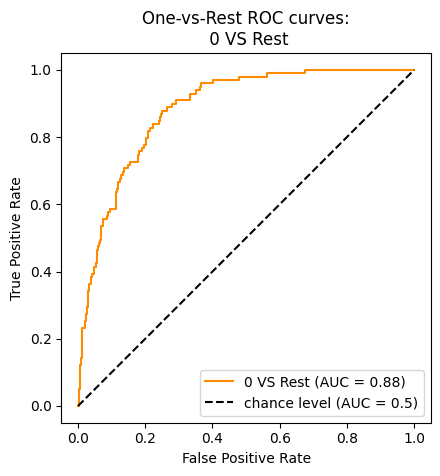

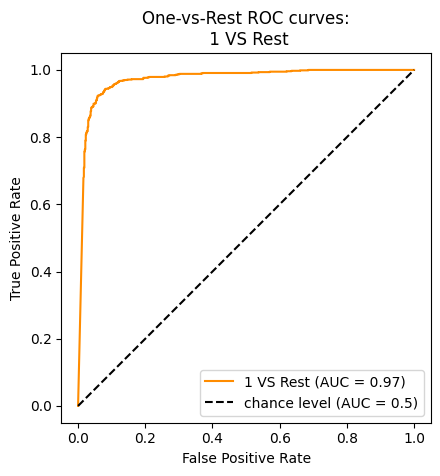

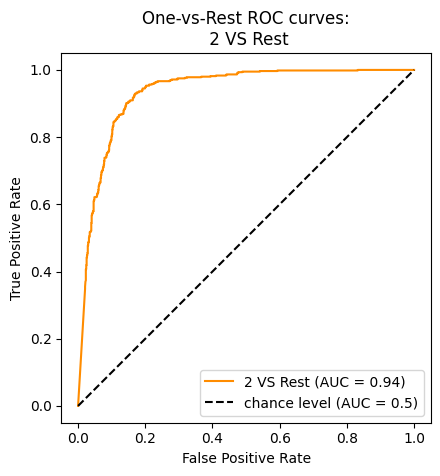

In [ ]:
label_encoder_total = preprocessing.LabelEncoder()
label_encoder_total.fit(y)

LB = LabelBinarizer().fit(y_train)
y_oh_test = LB.transform(y_test) # one hot y test label binarizer
y_oh_test.shape

num_classes = 3
for i in range(num_classes):
    id_class = i
    class_i_in_total = label_encoder_total.classes_[i]

    RocCurveDisplay.from_predictions(
        y_oh_test[:, id_class],
        y_probs[:, id_class],
        name=f"{class_i_in_total} VS Rest",
        color="darkorange",
    )

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"One-vs-Rest ROC curves:\n {class_i_in_total} VS Rest")
    plt.legend()
    plt.show()

<p>The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 0.93 means the classifier can perfectly distinguish between all the stat.ML and the cs.CV and cs.LG class points.</p>
<p>Besides, ROC curve of class 0 (stat.ML) against others shows that we cannot distinguish this class as well as other classes. It is due to the small amount of data in the training data and prior probability of assinging a data to this class is less than others.</p>

<div>
<font face="XB Zar" size=4>
In this section, draw the confusion matrix without using sklearn and with the help of matplotlib and seaborn.
</font>
</div>

In [ ]:
num_classes = 3

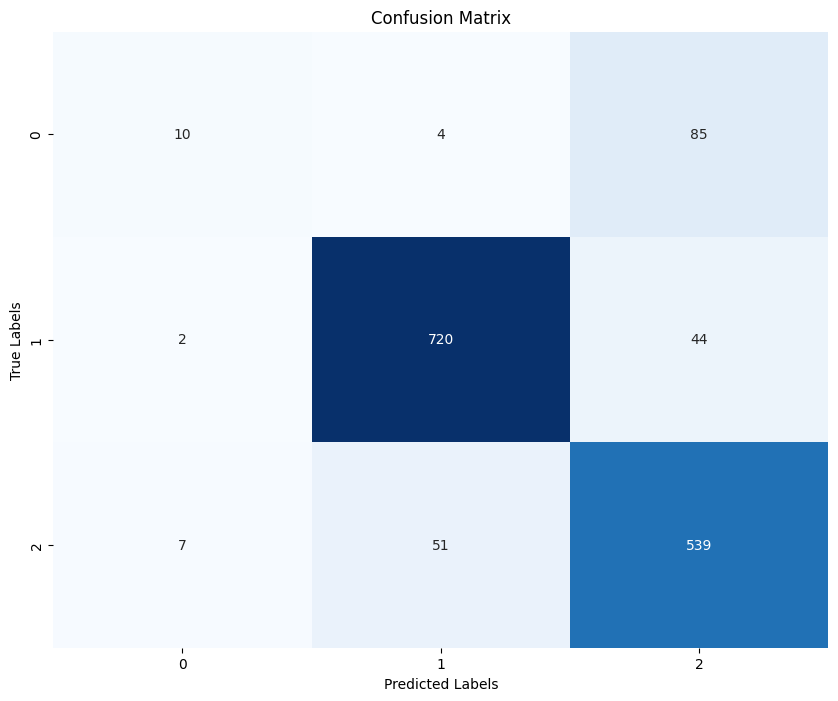

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(y_test)):
    true_label = y_test[i]
    pred_label = y_pred[i]
    confusion_matrix[true_label][pred_label] += 1

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div>
<font face="XB Zar" size=5>
    <h1>
    <b>Classification using Neural Net</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
     You have a dataset of scientific articles, each represented by an abstract and a corresponding topic. The goal is to build a neural network model that can predict the topic of a scientific article based on its abstract and title.
     </font>
</div>
   

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Datum</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
     The data you will work with in this section is multi-label. But for this section, we consider only the first tag of each article and look at the data as a single tag.
     </font>
</div>
   

## Requirements

In [1]:
# !pip install fasttext
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import os
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import ast
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from multiprocessing import Pool
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display
import pickle
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p>We run following codes in the kaggle. you can run it in the google colab by changing RNU_KAGGLE variable to 0.</p>

In [43]:
RUN_KAGGLE = 1
if RUN_KAGGLE:
    PATH = "/kaggle/working/MIR_PHASE2"
    os.makedirs(PATH)
    os.chdir(PATH)
    !gdown --id 1-3oQlxSCxZ7t_9mcxnIEeDdrvcM6oaRo
    !gdown --id 1-72MVnCkMbpi4JUGf6rNTpQYTbmTMDAg
    !gdown --id 1YlryBaHv_N9i2p-PLMhzLDAs0c5vVlI6
    !gdown --id 1wnSLFQZzn5iT1FhSNj4UdHAZONWcHvus
    !gdown --id 1MPLY7yK29TR5x6jhlP6BzHqk_KLRSUB-
    !gdown --id 1-8Q1FBAV4r-fG6vAn0pd1l3h4OUIqCWj
    !gdown --id 1-4A0Y7HQSQxVcqCVoPMBkDzqAWLL-Pbd
    !gdown --id 12MyeZuuQ_Ap3H_MkhLDP8465QHq4NXwV
else:
    PATH = "/content/drive/MyDrive/MIR_PAHSE2"

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-4A0Y7HQSQxVcqCVoPMBkDzqAWLL-Pbd
To: /kaggle/working/MIR_PHASE2/corpus_sentences_without_preprocess.pkl
100%|██████████████████████████████████████| 50.2M/50.2M [00:00<00:00, 53.0MB/s]


## Read and preprocess data

<p>If you read and preporcess data before, just load the dataframe:</p>

In [ ]:
with open(PATH+"/dataframe_arxive_final.pkl", "rb") as file:
    df = pickle.load(file)

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     First load the data. Clean it up or in other words do proper EDA on it so that we don't have null data or stuff like that.
 Perform the required pre-processing on the data that you learned about in the previous phase.
For the category of each article, consider its first label from the dataset.
</font>
</div>

In [ ]:
df = pd.read_csv('/kaggle/working/arxiv_data.csv')

In [ ]:
df.describe()

,titles,summaries,terms
count,51774,51774,51774
unique,38972,38979,3157
top,Transformers in Vision: A Survey,Astounding results from Transformer models on ...,['cs.CV']
freq,7,7,17369


In [ ]:
df = df.drop_duplicates(subset=['titles'])

In [ ]:
df.head(5)

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [ ]:
df = df.sample(frac=1)

In [ ]:
df.head(5)

,titles,summaries,terms
868,Performance Evaluation of Deep Learning Networ...,Semantic image segmentation is one the most de...,"['cs.CV', 'cs.LG', 'stat.ML']"
46279,A Principle of Least Action for the Training o...,Neural networks have been achieving high gener...,"['stat.ML', 'cs.LG']"
44190,Attention-based Deep Multiple Instance Learning,Multiple instance learning (MIL) is a variatio...,"['cs.LG', 'stat.ML']"
21205,G2DA: Geometry-Guided Dual-Alignment Learning ...,RGB-Infrared (IR) person re-identification aim...,"['cs.CV', '68T07 (Primary)', 'I.4.9']"
1605,Self-supervised Audiovisual Representation Lea...,Many current deep learning approaches make ext...,['cs.CV']


In [ ]:
print(df.isnull().sum())

titles       0

summaries    0

terms        0

dtype: int64


In [ ]:
topic_counts = df['terms'].value_counts()
print(topic_counts)

['cs.CV']                                                     12747

['cs.LG', 'stat.ML']                                           4074

['cs.LG']                                                      2046

['cs.CV', 'cs.LG']                                             1486

['cs.LG', 'cs.AI']                                             1206

                                                              ...  

['cs.CV', 'cs.CR', 'eess.IV', 'I.4.8']                            1

['cs.LG', 'cs.AI', 'cs.SY', 'eess.SP', 'eess.SY', 'I.2.6']        1

['cs.CV', 'I.2.10; I.4.3; D.1.3']                                 1

['cs.LG', 'cs.AI', 'cs.MA', '68T05', 'I.2.6']                     1

['cs.LG', 'cs.AI', 'math.CT']                                     1

Name: terms, Length: 3157, dtype: int64


In [ ]:
df['terms'] = df['terms'].apply(lambda x: ast.literal_eval(x)[0] if len(x) > 0 else None) # Class Label -> first element of class list belongs to
topic_counts = df['terms'].value_counts()
print(topic_counts)

cs.CV      20478

cs.LG      15973

stat.ML     2521

Name: terms, dtype: int64


In [ ]:
df.describe()

,titles,summaries,terms
count,38972,38972,38972
unique,38972,38966,3
top,Performance Evaluation of Deep Learning Networ...,Feature learning forms the cornerstone for tac...,cs.CV
freq,1,2,20478


In [11]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

<p>I don't remove stopwords of domain (corpus) although it reduce the size of data but this data is functional and improve performance of classifier</p>


<div dir="ltr">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
Preprocess all summaries and titles and concatenate together for input of the fasttext model for embedding of tokens and documents: 
</font>
</div>

In [ ]:
df['preprocessed_summaries'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_sentences = df['preprocessed_title'] + df['preprocessed_summaries']
print(preprocessed_sentences)

<p>Save dataframe:</p>

In [ ]:
# with open(PATH+"/dataframe_arxive_final.pkl", "wb") as file:
#     pickle.dump(df, file)

<p>Save sentences:</p>

In [ ]:
# with open("/content/drive/MyDrive/preprocessed_sentences_final.pkl", "wb") as file:
#     pickle.dump(preprocessed_sentences, file)

<p>Load sentences:</p>

In [13]:
with open(PATH+"/preprocessed_sentences_final.pkl", "rb") as file:
    preprocessed_sentences = pickle.load(file)

<p>Add header and Save corpus without preprocessing (preprocessing in some future tasks reduce accuracy)</p>

In [ ]:
combined_with_header_total = df['preprocessed_title'].apply(lambda x: "Title: " + ' '.join(x)+ ". Summary: ") + df['preprocessed_summaries'].apply(lambda x: ' '.join(x))
combined_with_header_without_preprcess_total = df['titles'].apply(lambda x: "Title: " + x + ". Summary: ") + df['summaries']
corpus_sentences = [x for x in list(combined_with_header_total)]
corpus_sentences_without_preprocess = [x for x in list(combined_with_header_without_preprcess_total)]
corpus_labels = list(df['terms'])

In [ ]:
print(corpus_sentences_without_preprocess[0])

semantic image segmentation is one the most demanding task especially for analysis of traffic conditions for self-driving cars here the results of application of several deep learning architectures pspnet and icnet for semantic image segmentation of traffic stereo-pair images are presented the images from cityscapes dataset and custom urban images were analyzed as to the segmentation accuracy and image inference time for the models pre-trained on cityscapes dataset the inference time was equal in the limits of standard deviation but the segmentation accuracy was different for various cities and stereo channels even the distributions of accuracy mean intersection over union miou values for each city and channel are asymmetric long-tailed and have many extreme outliers especially for pspnet network in comparison to icnet network some statistical properties of these distributions skewness kurtosis allow us to distinguish these two networks and open the question about relations between arc

In [ ]:
print(corpus_sentences[0])

Title: specific differential entropy rate estimation continuous-valued time series. Summary: introduce method quantifying inherent unpredictability continuous-valued time series via extension differential shannon entropy rate extension specific entropy rate quantifies amount predictive uncertainty associated specific state rather averaged states relate specific entropy rate popular complexity measures approximate sample entropies provide data-driven approach estimating specific entropy rate observed time series finally consider three case studies estimating specific entropy rate synthetic physiological data relevant analysis heart rate variability


<p>Save corpus sentences without preprocessing:</p>

In [ ]:
# with open(PATH+"/corpus_sentences_without_preprocess.pkl", "wb") as file:
#     pickle.dump(corpus_sentences_without_preprocess, file)

<p>Load sentences:</p>

In [ ]:
with open(PATH+"/corpus_sentences_without_preprocess.pkl", "rb") as file:
    corpus_sentences_without_preprocess = pickle.load(file)

<p>Save corpus labels:</p>

In [ ]:
# with open(PATH+"/corpus_labels.pkl", "wb") as file:
#     pickle.dump(corpus_labels, file)

<p>Load labels:</p>

In [ ]:
with open(PATH+"/corpus_labels.pkl", "rb") as file:
    corpus_labels = pickle.load(file)

## Vectorize data

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     In this part, we get help from fasttext to get a basic embedding for each article.
Using the data we have, train a fasttext model that gives 100 embeddings for each token.
In the next step, calculate the weighted average of the fasttext embeddings of the input tokens (abstract + title) based on their tfidif and arrive at the final text embedding.
    <br>
In fact, in simpler terms, based on the weighted average, where our weights are tfidf tokens, we reach the final text embedding based on fasttext.
</font>
</div>

In [9]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train_fasttext(self, corpus_file):
        model = fasttext.train_unsupervised(corpus_file, dim=100, model='skipgram', thread=1)
        return model

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with open("corpus.txt", 'w') as file:
            for doc_tokens in texts:
                doc_text = ' '.join(doc_tokens)
                file.write(doc_text + '\n')
        self.model = self.train_fasttext("corpus.txt")

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        preprocessed_query = self.preprocessor(query)

        query_vector = tf_idf_vectorizer.transform([' '.join(preprocessed_query)])

        query_embeddings = []
        total_tf_idf_weight = 0
        feature_names = tf_idf_vectorizer.get_feature_names_out()
        for word_idx in query_vector.indices:
            word = feature_names[word_idx]
            tfidf_weight = query_vector[0, word_idx]
            embedding = self.model.get_sentence_vector(word)
            query_embeddings.append(embedding*tfidf_weight)
            total_tf_idf_weight += tfidf_weight

        query_embed = sum(query_embeddings) / total_tf_idf_weight
        return query_embed

    def save_FastText_model(self, path=PATH+'/FastText_model_20k.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path=PATH+"/FastText_model_20k.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

<p>Train:</p>

In [ ]:
# FastText_model = FastText(preprocessor=preprocess_text)
# FastText_model.prepare(preprocessed_sentences, mode='train', save=True)

<p>If you train fastText before, just load the trained model:</p>

In [16]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_sentences, mode='load')

In [ ]:
text = 'covid'
FastText_model.model.get_nearest_neighbors(text)

[(0.9353189468383789, 'covid19'),
 (0.9056328535079956, 'covid-19'),
 (0.8628652691841125, 'dr-covid'),
 (0.806492269039154, 'pandemic'),
 (0.7820185422897339, 'outbreak'),
 (0.7733287215232849, 'pandemics'),
 (0.7584951519966125, 'coronavirus'),
 (0.7309215068817139, 'endemic'),
 (0.722892701625824, 'sars-cov-2'),
 (0.7201848030090332, 'outbreaks')]

In [17]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit([' '.join(doc) for doc in data])

In [18]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_sentences)

In [ ]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
print(FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer))

[ 0.03830472  0.00888313  0.01135148 -0.01763562  0.03658425 -0.05933763



 -0.10265934  0.08581129  0.0534874   0.02376587  0.10783315  0.01031612



  0.11481713 -0.1587834   0.17457458 -0.10453212 -0.15456243 -0.069778



  0.03702371  0.10773437  0.00198141 -0.10859968  0.04299244 -0.07993722



 -0.04052622 -0.01707507  0.18528728  0.12274852  0.13170111 -0.04578967



 -0.0725282   0.09113089  0.05675068  0.09702503 -0.0537228   0.09068239



  0.00265148 -0.07300973 -0.13686663  0.05217171  0.05589426 -0.00543225



  0.16672905  0.01023094  0.0687295  -0.01820652 -0.08270442 -0.12658761



  0.0124981  -0.09584381  0.07518267 -0.14990957 -0.07775558  0.00203617



  0.0649688  -0.09444395  0.06840435 -0.01079922 -0.04126284 -0.08279434



  0.01836312 -0.05312871  0.00879899 -0.04272     0.04478705  0.08987956



 -0.11171704  0.03837256 -0.09388435  0.06629813  0.12265895 -0.0455328



  0.08724407 -0.0525706  -0.02852073 -0.04320562 -0.14729483 -0.0091152



  0.12248746 -0.

<p>Save embeddings in drive and use it to reduce time overhead of running the project, (creating embeddings takes 1 hours time), you can just load the embeddings if you run this before and saved it.</p>

In [22]:
DOC_EMBEDDING_NUM = 15000

In [ ]:
embeddings = [FastText_model.get_query_embedding(' '.join(doc), TF_IDF_model.vectorizer) for doc in preprocessed_sentences[:DOC_EMBEDDING_NUM]]

<p>Store embeddings:</p>

In [ ]:
# with open(PATH+"/embeddings20k_without_preprocess.pkl", "wb") as file:
#     pickle.dump(embeddings, file)

<p>If you find embedding of the docs before, just load embeddings:</p>

In [19]:
with open(PATH+"/embeddings15k_without_preprocess.pkl", "rb") as file:
    embeddings = pickle.load(file)

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     Now, with the help of the model you wrote, create the input data of the neural network.
In other words, get the relevant embedding for each article.
Also, convert the labels into numbers so that the neural network can understand them.
     </font>
</div>

## Prepare data for model

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
    In this section, create the input dataset of the neural network.
Also, divide the data into train test validation parts.
Consider 80% data for training, 10% for validation and 10% for testing. Finally, build the relevant dataloaders.     
</font>
</div>

In [20]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, index):
        embedding = self.embeddings[index]
        label = self.labels[index]
        return embedding, label

In [23]:
encode_class_label = {
    'stat.ML': 0,
    'cs.CV': 1,
    'cs.LG': 2
}
labels = [encode_class_label[i] for i in np.array(df['terms'])][:DOC_EMBEDDING_NUM]

In [ ]:
x_train, x_val_test, y_train, y_val_test = train_test_split(embeddings, labels, test_size=0.2, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=1)

train_dataset = PapersDataSet(x_train, y_train)
val_dataset = PapersDataSet(x_val, y_val)
test_dataset = PapersDataSet(x_test, y_test)

batch_size = 32 

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Build model

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
    Now, in this section, define your neural network model.
 </font>
</div>

In [27]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super(ClassifierModel, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, num_classes)
        self.relu3 = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.relu2(self.bn2(self.fc2(out)))
        out = self.fc3(out)
        return self.relu3(out)

## Train model

In [ ]:
PATH_ = PATH+"/nn_torch_classifier_with_fasttext_model.pt"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

# Load
model = torch.load(PATH_)

<p>If you train your model before and save it at the end of process, just load the torch model and run cell above.</p>

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
    In this section, train your model with the help of training and validation data.
Save the required information such as train and validation losses to evaluate your model with the help of the learning graph.    
 </font>
</div>

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [ ]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    eval_loss = 0.0
    predicted_labels = []
    true_labels = []

    model.eval()

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            eval_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            predicted_labels.extend(predicted.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())
    
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')

    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 80

train_loss_arr, val_loss_arr = [], []
f1_macro_scores_train, f1_macro_scores_val = [], []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            optimizer.zero_grad()
            inputs = x.to(device)
            labels = label.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, y_preds = torch.max(outputs, dim=1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            
            pbar.set_description(f'Train Loss: {train_loss:.4f}')
  
    f1_score_macro_train = f1_score(labels, y_preds.tolist(), average="macro")
    
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro_val = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores_train.append(f1_score_macro_train)
    f1_macro_scores_val.append(f1_score_macro_val)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Train Loss: 5503.1267: 100%|██████████| 375/375 [00:01<00:00, 205.87it/s]


Epoch 1 finished in 1.87s



[Epoch 1]	Train Loss: 0.4586	Validation Loss: 0.3892	 F1 score macro: 0.6239608289273672


Train Loss: 4461.4586: 100%|██████████| 375/375 [00:01<00:00, 216.64it/s]


Epoch 2 finished in 1.78s



[Epoch 2]	Train Loss: 0.3718	Validation Loss: 0.3708	 F1 score macro: 0.678541301756717


Train Loss: 4246.3461: 100%|██████████| 375/375 [00:01<00:00, 207.28it/s]


Epoch 3 finished in 1.86s



[Epoch 3]	Train Loss: 0.3539	Validation Loss: 0.3708	 F1 score macro: 0.6882341084220279


Train Loss: 4038.7453: 100%|██████████| 375/375 [00:01<00:00, 208.90it/s]


Epoch 4 finished in 1.85s



[Epoch 4]	Train Loss: 0.3366	Validation Loss: 0.3782	 F1 score macro: 0.6620164541409613


Train Loss: 3920.7385: 100%|██████████| 375/375 [00:01<00:00, 196.30it/s]


Epoch 5 finished in 1.97s



[Epoch 5]	Train Loss: 0.3267	Validation Loss: 0.3749	 F1 score macro: 0.6632402493205078


Train Loss: 3746.7277: 100%|██████████| 375/375 [00:01<00:00, 210.70it/s]


Epoch 6 finished in 1.84s



[Epoch 6]	Train Loss: 0.3122	Validation Loss: 0.3709	 F1 score macro: 0.6878521862336253


Train Loss: 3675.4010: 100%|██████████| 375/375 [00:01<00:00, 193.78it/s]


Epoch 7 finished in 1.98s



[Epoch 7]	Train Loss: 0.3063	Validation Loss: 0.3791	 F1 score macro: 0.6708957952369444


Train Loss: 3578.9591: 100%|██████████| 375/375 [00:01<00:00, 216.39it/s]


Epoch 8 finished in 1.78s



[Epoch 8]	Train Loss: 0.2982	Validation Loss: 0.3910	 F1 score macro: 0.6774066351399849


Train Loss: 3315.9696: 100%|██████████| 375/375 [00:01<00:00, 210.41it/s]


Epoch 9 finished in 1.83s



[Epoch 9]	Train Loss: 0.2763	Validation Loss: 0.3950	 F1 score macro: 0.6644992407417919


Train Loss: 3216.5333: 100%|██████████| 375/375 [00:01<00:00, 204.85it/s]


Epoch 10 finished in 1.88s



[Epoch 10]	Train Loss: 0.2680	Validation Loss: 0.4265	 F1 score macro: 0.6851194546351907


Train Loss: 3101.1989: 100%|██████████| 375/375 [00:01<00:00, 220.21it/s]


Epoch 11 finished in 1.75s



[Epoch 11]	Train Loss: 0.2584	Validation Loss: 0.4317	 F1 score macro: 0.6221429549423033


Train Loss: 2936.3731: 100%|██████████| 375/375 [00:01<00:00, 209.95it/s]


Epoch 12 finished in 1.84s



[Epoch 12]	Train Loss: 0.2447	Validation Loss: 0.4070	 F1 score macro: 0.6765380511005789


Train Loss: 2804.1153: 100%|██████████| 375/375 [00:01<00:00, 197.71it/s]


Epoch 13 finished in 1.96s



[Epoch 13]	Train Loss: 0.2337	Validation Loss: 0.4204	 F1 score macro: 0.6916590813668647


Train Loss: 2657.1976: 100%|██████████| 375/375 [00:01<00:00, 208.80it/s]


Epoch 14 finished in 1.86s



[Epoch 14]	Train Loss: 0.2214	Validation Loss: 0.4236	 F1 score macro: 0.6673351848819097


Train Loss: 2567.4937: 100%|██████████| 375/375 [00:01<00:00, 198.92it/s]


Epoch 15 finished in 1.96s



[Epoch 15]	Train Loss: 0.2140	Validation Loss: 0.4581	 F1 score macro: 0.6763277410199858


Train Loss: 2400.7156: 100%|██████████| 375/375 [00:01<00:00, 206.08it/s]


Epoch 16 finished in 1.88s



[Epoch 16]	Train Loss: 0.2001	Validation Loss: 0.4627	 F1 score macro: 0.6796514444368884


Train Loss: 2343.3659: 100%|██████████| 375/375 [00:01<00:00, 207.16it/s]


Epoch 17 finished in 1.86s



[Epoch 17]	Train Loss: 0.1953	Validation Loss: 0.4685	 F1 score macro: 0.6703028292934597


Train Loss: 2103.2017: 100%|██████████| 375/375 [00:01<00:00, 206.15it/s]


Epoch 18 finished in 1.87s



[Epoch 18]	Train Loss: 0.1753	Validation Loss: 0.4718	 F1 score macro: 0.6650149900417957


Train Loss: 2136.8558: 100%|██████████| 375/375 [00:01<00:00, 208.88it/s]


Epoch 19 finished in 1.85s



[Epoch 19]	Train Loss: 0.1781	Validation Loss: 0.4717	 F1 score macro: 0.6675169016648327


Train Loss: 1989.5913: 100%|██████████| 375/375 [00:01<00:00, 208.87it/s]


Epoch 20 finished in 1.84s



[Epoch 20]	Train Loss: 0.1658	Validation Loss: 0.4920	 F1 score macro: 0.6645314898992898


Train Loss: 1922.3835: 100%|██████████| 375/375 [00:01<00:00, 201.90it/s]


Epoch 21 finished in 1.93s



[Epoch 21]	Train Loss: 0.1602	Validation Loss: 0.4945	 F1 score macro: 0.6775248558226786


Train Loss: 1783.4581: 100%|██████████| 375/375 [00:01<00:00, 210.37it/s]


Epoch 22 finished in 1.85s



[Epoch 22]	Train Loss: 0.1486	Validation Loss: 0.4931	 F1 score macro: 0.6754468947451405


Train Loss: 1755.7143: 100%|██████████| 375/375 [00:01<00:00, 207.61it/s]


Epoch 23 finished in 1.87s



[Epoch 23]	Train Loss: 0.1463	Validation Loss: 0.5307	 F1 score macro: 0.6674932819179363


Train Loss: 1674.6272: 100%|██████████| 375/375 [00:01<00:00, 202.24it/s]


Epoch 24 finished in 1.92s



[Epoch 24]	Train Loss: 0.1396	Validation Loss: 0.5361	 F1 score macro: 0.6892825788604252


Train Loss: 1573.8758: 100%|██████████| 375/375 [00:01<00:00, 202.03it/s]


Epoch 25 finished in 1.91s



[Epoch 25]	Train Loss: 0.1312	Validation Loss: 0.5441	 F1 score macro: 0.6751717547653775


Train Loss: 1608.7025: 100%|██████████| 375/375 [00:01<00:00, 200.63it/s]


Epoch 26 finished in 1.92s



[Epoch 26]	Train Loss: 0.1341	Validation Loss: 0.5584	 F1 score macro: 0.6707956407474821


Train Loss: 1434.1591: 100%|██████████| 375/375 [00:01<00:00, 206.78it/s]


Epoch 27 finished in 1.86s



[Epoch 27]	Train Loss: 0.1195	Validation Loss: 0.5737	 F1 score macro: 0.6622892655294539


Train Loss: 1473.2329: 100%|██████████| 375/375 [00:01<00:00, 203.38it/s]


Epoch 28 finished in 1.89s



[Epoch 28]	Train Loss: 0.1228	Validation Loss: 0.5655	 F1 score macro: 0.6823296647953828


Train Loss: 1374.8248: 100%|██████████| 375/375 [00:01<00:00, 216.93it/s]


Epoch 29 finished in 1.78s



[Epoch 29]	Train Loss: 0.1146	Validation Loss: 0.5793	 F1 score macro: 0.7004731113750341


Train Loss: 1334.9405: 100%|██████████| 375/375 [00:01<00:00, 195.60it/s]


Epoch 30 finished in 1.99s



[Epoch 30]	Train Loss: 0.1112	Validation Loss: 0.5967	 F1 score macro: 0.6653750071695812


Train Loss: 1366.5598: 100%|██████████| 375/375 [00:01<00:00, 206.57it/s]


Epoch 31 finished in 1.88s



[Epoch 31]	Train Loss: 0.1139	Validation Loss: 0.6132	 F1 score macro: 0.6593980572136334


Train Loss: 1280.2197: 100%|██████████| 375/375 [00:01<00:00, 193.49it/s]


Epoch 32 finished in 2.01s



[Epoch 32]	Train Loss: 0.1067	Validation Loss: 0.5856	 F1 score macro: 0.6666714404419323


Train Loss: 1141.8075: 100%|██████████| 375/375 [00:01<00:00, 202.67it/s]


Epoch 33 finished in 1.90s



[Epoch 33]	Train Loss: 0.0952	Validation Loss: 0.6232	 F1 score macro: 0.6646396168135299


Train Loss: 1245.0317: 100%|██████████| 375/375 [00:01<00:00, 200.22it/s]


Epoch 34 finished in 1.92s



[Epoch 34]	Train Loss: 0.1038	Validation Loss: 0.6092	 F1 score macro: 0.6541732231838447


Train Loss: 1061.2965: 100%|██████████| 375/375 [00:01<00:00, 209.95it/s]


Epoch 35 finished in 1.84s



[Epoch 35]	Train Loss: 0.0884	Validation Loss: 0.6213	 F1 score macro: 0.6653890374111885


Train Loss: 1185.3281: 100%|██████████| 375/375 [00:01<00:00, 215.22it/s]


Epoch 36 finished in 1.79s



[Epoch 36]	Train Loss: 0.0988	Validation Loss: 0.6387	 F1 score macro: 0.6757870124826016


Train Loss: 1128.8095: 100%|██████████| 375/375 [00:01<00:00, 210.43it/s]


Epoch 37 finished in 1.83s



[Epoch 37]	Train Loss: 0.0941	Validation Loss: 0.6202	 F1 score macro: 0.671256315371208


Train Loss: 1058.4917: 100%|██████████| 375/375 [00:01<00:00, 197.19it/s]


Epoch 38 finished in 1.97s



[Epoch 38]	Train Loss: 0.0882	Validation Loss: 0.6484	 F1 score macro: 0.6796861126743523


Train Loss: 1099.8190: 100%|██████████| 375/375 [00:01<00:00, 212.29it/s]


Epoch 39 finished in 1.83s



[Epoch 39]	Train Loss: 0.0917	Validation Loss: 0.6578	 F1 score macro: 0.6454742290189471


Train Loss: 974.3820: 100%|██████████| 375/375 [00:01<00:00, 191.40it/s]


Epoch 40 finished in 2.05s



[Epoch 40]	Train Loss: 0.0812	Validation Loss: 0.6318	 F1 score macro: 0.6994315274034326


Train Loss: 1120.6509: 100%|██████████| 375/375 [00:02<00:00, 186.81it/s]


Epoch 41 finished in 2.07s



[Epoch 41]	Train Loss: 0.0934	Validation Loss: 0.6490	 F1 score macro: 0.6724504943896011


Train Loss: 1053.2627: 100%|██████████| 375/375 [00:01<00:00, 212.98it/s]


Epoch 42 finished in 1.81s



[Epoch 42]	Train Loss: 0.0878	Validation Loss: 0.6807	 F1 score macro: 0.6626524151242404


Train Loss: 910.4491: 100%|██████████| 375/375 [00:01<00:00, 207.73it/s]


Epoch 43 finished in 1.86s



[Epoch 43]	Train Loss: 0.0759	Validation Loss: 0.6633	 F1 score macro: 0.6698629232500305


Train Loss: 916.1479: 100%|██████████| 375/375 [00:01<00:00, 203.17it/s]


Epoch 44 finished in 1.90s



[Epoch 44]	Train Loss: 0.0763	Validation Loss: 0.6608	 F1 score macro: 0.6694521499284557


Train Loss: 972.2687: 100%|██████████| 375/375 [00:01<00:00, 199.96it/s]


Epoch 45 finished in 1.93s



[Epoch 45]	Train Loss: 0.0810	Validation Loss: 0.6550	 F1 score macro: 0.6738404354760809


Train Loss: 962.1148: 100%|██████████| 375/375 [00:01<00:00, 196.30it/s]


Epoch 46 finished in 1.98s



[Epoch 46]	Train Loss: 0.0802	Validation Loss: 0.6837	 F1 score macro: 0.6730044468625875


Train Loss: 981.4433: 100%|██████████| 375/375 [00:01<00:00, 198.18it/s]


Epoch 47 finished in 1.96s



[Epoch 47]	Train Loss: 0.0818	Validation Loss: 0.6628	 F1 score macro: 0.6792404958141806


Train Loss: 883.6110: 100%|██████████| 375/375 [00:01<00:00, 212.81it/s]


Epoch 48 finished in 1.82s



[Epoch 48]	Train Loss: 0.0736	Validation Loss: 0.6787	 F1 score macro: 0.6840163380293168


Train Loss: 799.5968: 100%|██████████| 375/375 [00:01<00:00, 206.31it/s]


Epoch 49 finished in 1.90s



[Epoch 49]	Train Loss: 0.0666	Validation Loss: 0.6691	 F1 score macro: 0.69417598168477


Train Loss: 943.8317: 100%|██████████| 375/375 [00:01<00:00, 206.45it/s]


Epoch 50 finished in 1.89s



[Epoch 50]	Train Loss: 0.0787	Validation Loss: 0.6946	 F1 score macro: 0.6847765930593975


Train Loss: 860.9645: 100%|██████████| 375/375 [00:01<00:00, 199.87it/s]


Epoch 51 finished in 1.93s



[Epoch 51]	Train Loss: 0.0717	Validation Loss: 0.6799	 F1 score macro: 0.6888701253302201


Train Loss: 871.5966: 100%|██████████| 375/375 [00:01<00:00, 201.93it/s]


Epoch 52 finished in 1.91s



[Epoch 52]	Train Loss: 0.0726	Validation Loss: 0.7006	 F1 score macro: 0.6926557692533772


Train Loss: 776.9218: 100%|██████████| 375/375 [00:01<00:00, 200.28it/s]


Epoch 53 finished in 1.92s



[Epoch 53]	Train Loss: 0.0647	Validation Loss: 0.6986	 F1 score macro: 0.6645772971061454


Train Loss: 766.7844: 100%|██████████| 375/375 [00:01<00:00, 203.06it/s]


Epoch 54 finished in 1.90s



[Epoch 54]	Train Loss: 0.0639	Validation Loss: 0.7428	 F1 score macro: 0.6685939794567357


Train Loss: 820.7260: 100%|██████████| 375/375 [00:01<00:00, 200.60it/s]


Epoch 55 finished in 1.93s



[Epoch 55]	Train Loss: 0.0684	Validation Loss: 0.7426	 F1 score macro: 0.6495277983082861


Train Loss: 822.2196: 100%|██████████| 375/375 [00:01<00:00, 222.83it/s]


Epoch 56 finished in 1.77s



[Epoch 56]	Train Loss: 0.0685	Validation Loss: 0.7346	 F1 score macro: 0.6658671008265816


Train Loss: 831.7347: 100%|██████████| 375/375 [00:01<00:00, 215.66it/s]


Epoch 57 finished in 1.81s



[Epoch 57]	Train Loss: 0.0693	Validation Loss: 0.7386	 F1 score macro: 0.6688063285247514


Train Loss: 762.8754: 100%|██████████| 375/375 [00:01<00:00, 206.33it/s]


Epoch 58 finished in 1.89s



[Epoch 58]	Train Loss: 0.0636	Validation Loss: 0.7118	 F1 score macro: 0.6681128614545112


Train Loss: 731.5836: 100%|██████████| 375/375 [00:01<00:00, 206.08it/s]


Epoch 59 finished in 1.89s



[Epoch 59]	Train Loss: 0.0610	Validation Loss: 0.7415	 F1 score macro: 0.6476132595428422


Train Loss: 819.0769: 100%|██████████| 375/375 [00:01<00:00, 194.62it/s]


Epoch 60 finished in 1.98s



[Epoch 60]	Train Loss: 0.0683	Validation Loss: 0.7037	 F1 score macro: 0.6778426691319265


Train Loss: 800.8412: 100%|██████████| 375/375 [00:01<00:00, 205.70it/s]


Epoch 61 finished in 1.87s



[Epoch 61]	Train Loss: 0.0667	Validation Loss: 0.7016	 F1 score macro: 0.6787934168162026


Train Loss: 715.0932: 100%|██████████| 375/375 [00:01<00:00, 210.30it/s]


Epoch 62 finished in 1.84s



[Epoch 62]	Train Loss: 0.0596	Validation Loss: 0.7511	 F1 score macro: 0.6738298582663299


Train Loss: 758.6448: 100%|██████████| 375/375 [00:01<00:00, 201.17it/s]


Epoch 63 finished in 1.94s



[Epoch 63]	Train Loss: 0.0632	Validation Loss: 0.7571	 F1 score macro: 0.6737476281323335


Train Loss: 722.8315: 100%|██████████| 375/375 [00:01<00:00, 197.35it/s]


Epoch 64 finished in 1.97s



[Epoch 64]	Train Loss: 0.0602	Validation Loss: 0.7340	 F1 score macro: 0.7013004109687596


Train Loss: 751.9617: 100%|██████████| 375/375 [00:01<00:00, 204.24it/s]


Epoch 65 finished in 1.93s



[Epoch 65]	Train Loss: 0.0627	Validation Loss: 0.7220	 F1 score macro: 0.6577668395832568


Train Loss: 558.0423: 100%|██████████| 375/375 [00:01<00:00, 203.32it/s]


Epoch 66 finished in 1.92s



[Epoch 66]	Train Loss: 0.0465	Validation Loss: 0.7327	 F1 score macro: 0.6638613449711759


Train Loss: 627.4262: 100%|██████████| 375/375 [00:01<00:00, 209.11it/s]


Epoch 67 finished in 1.86s



[Epoch 67]	Train Loss: 0.0523	Validation Loss: 0.7539	 F1 score macro: 0.6569903962269267


Train Loss: 684.2780: 100%|██████████| 375/375 [00:01<00:00, 206.54it/s]


Epoch 68 finished in 1.89s



[Epoch 68]	Train Loss: 0.0570	Validation Loss: 0.7475	 F1 score macro: 0.6765356790898999


Train Loss: 616.8238: 100%|██████████| 375/375 [00:01<00:00, 203.18it/s]


Epoch 69 finished in 1.90s



[Epoch 69]	Train Loss: 0.0514	Validation Loss: 0.7356	 F1 score macro: 0.6593696638526837


Train Loss: 619.3265: 100%|██████████| 375/375 [00:01<00:00, 200.64it/s]


Epoch 70 finished in 1.92s



[Epoch 70]	Train Loss: 0.0516	Validation Loss: 0.7540	 F1 score macro: 0.657896898551435


Train Loss: 698.1131: 100%|██████████| 375/375 [00:01<00:00, 194.28it/s]


Epoch 71 finished in 1.98s



[Epoch 71]	Train Loss: 0.0582	Validation Loss: 0.7031	 F1 score macro: 0.684834093297328


Train Loss: 585.0909: 100%|██████████| 375/375 [00:01<00:00, 207.84it/s]


Epoch 72 finished in 1.87s



[Epoch 72]	Train Loss: 0.0488	Validation Loss: 0.7769	 F1 score macro: 0.6594074191447872


Train Loss: 675.0382: 100%|██████████| 375/375 [00:01<00:00, 214.43it/s]


Epoch 73 finished in 1.84s



[Epoch 73]	Train Loss: 0.0563	Validation Loss: 0.7867	 F1 score macro: 0.6464855294518216


Train Loss: 609.7615: 100%|██████████| 375/375 [00:01<00:00, 213.91it/s]


Epoch 74 finished in 1.82s



[Epoch 74]	Train Loss: 0.0508	Validation Loss: 0.7743	 F1 score macro: 0.6627034755620275


Train Loss: 598.1891: 100%|██████████| 375/375 [00:01<00:00, 191.42it/s]


Epoch 75 finished in 2.03s



[Epoch 75]	Train Loss: 0.0498	Validation Loss: 0.7862	 F1 score macro: 0.6591959685138867


Train Loss: 577.3507: 100%|██████████| 375/375 [00:01<00:00, 192.28it/s]


Epoch 76 finished in 2.02s



[Epoch 76]	Train Loss: 0.0481	Validation Loss: 0.7883	 F1 score macro: 0.669275564862673


Train Loss: 539.1986: 100%|██████████| 375/375 [00:01<00:00, 205.18it/s]


Epoch 77 finished in 1.90s



[Epoch 77]	Train Loss: 0.0449	Validation Loss: 0.8162	 F1 score macro: 0.6613406028750757


Train Loss: 664.7291: 100%|██████████| 375/375 [00:01<00:00, 204.23it/s]


Epoch 78 finished in 1.89s



[Epoch 78]	Train Loss: 0.0554	Validation Loss: 0.7746	 F1 score macro: 0.646471323327884


Train Loss: 614.1709: 100%|██████████| 375/375 [00:01<00:00, 203.97it/s]


Epoch 79 finished in 1.89s



[Epoch 79]	Train Loss: 0.0512	Validation Loss: 0.8082	 F1 score macro: 0.6644020447138974


Train Loss: 548.6076: 100%|██████████| 375/375 [00:01<00:00, 215.12it/s]


Epoch 80 finished in 1.81s



[Epoch 80]	Train Loss: 0.0457	Validation Loss: 0.8246	 F1 score macro: 0.6589639973736009


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

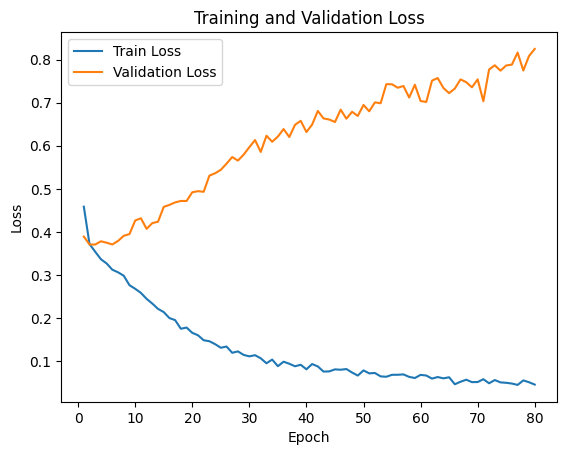

In [ ]:
plt.plot(range(1, num_epochs + 1), train_loss_arr, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_loss_arr, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     Draw the graph of f1 score by epoch for train and validation data.
 </font>
</div>

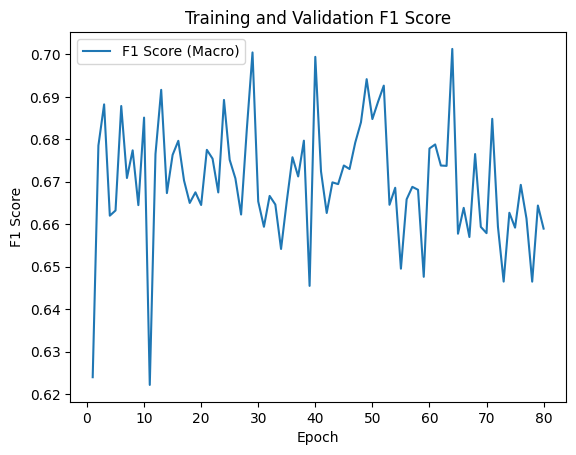

In [ ]:
plt.plot(range(1, num_epochs + 1), f1_macro_scores_train, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), f1_macro_scores_val, label='F1 Score (Macro)')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.show()

## Evaluate model

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
    Now give the test data to your model and get the following based on the outputs.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

accuracy = accuracy_score(true_labels, predicted_labels)

f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')

confusion_mat = confusion_matrix(true_labels, predicted_labels)

precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')

precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')

print(f"Accuracy: {accuracy:.4f}\n")
print(f"Loss: {eval_loss:.4f}")
print(f"F1-Macro: {f1_score_macro:.4f}")
print(f"F1-Micro: {f1_score_micro:.4f}")
print("Confusion Matrix:")
print(confusion_mat)
print(f"Macro-Average Precision: {precision_macro:.4f}")
print(f"Macro-Average Recall: {recall_macro:.4f}")
print(f"Micro-Average Precision: {precision_micro:.4f}")
print(f"Micro-Average Recall: {recall_micro:.4f}")

Accuracy: 0.8533







Loss: 1248.7420



F1-Macro: 0.6929



F1-Micro: 0.8533



Confusion Matrix:



[[ 24   8  55]



 [  3 724  51]



 [ 33  70 532]]



Macro-Average Precision: 0.7122



Macro-Average Recall: 0.6814



Micro-Average Precision: 0.8533



Micro-Average Recall: 0.8533


<div>
<font face="XB Zar" size=3>
     <br>
    Finally, in this section, write a function that takes a text as input and gives it the appropriate label based on your model.
    <br>
    <br>
    </font>
</div>
    

In [35]:
id2label = {
    0: 'stat.ML',
    1: 'cs.CV',
    2: 'cs.LG'
}

In [36]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    TF_IDF_model.vectorizer.transform([' '.join(preprocess_text(x))])
    x_test = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    
    x_tensor = torch.tensor(x_test).unsqueeze(0).to(device)

    model.eval()

    with torch.no_grad():
        outputs = model(x_tensor)

    _, predicted = torch.max(outputs, 1)
    predicted_class = predicted.cpu().numpy()[0]

    return id2label[predicted_class]

In [37]:
predict('The ViT is a visual model based on the architecture of a transformer originally designed for text-based tasks')

'cs.CV'

In [32]:
PATH_ = PATH+"/nn_torch_classifier_with_fasttext_model.pt"

# Save
model = torch.load(PATH_)

<div>
<font face="XB Zar" size=5>
    <h1>
    <b> Classification using Language Models</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
     In this part, we are going to create our own classifier with the help of pre-trained language models and fine-tuning them.
</font>
</div>
   

<p>If you trained your model before, just load the following cell to add your model from drive to kaggle.</p>

In [53]:
RUN_KAGGLE = 1
if RUN_KAGGLE:
    PATH_ = "/kaggle/working/MIR_PHASE2/my_model"
    os.makedirs(PATH_)
    os.chdir(PATH_)
    !gdown --id 13gzrvdTnOrHcyiM71khiUTQtSpnvyD-t
    !gdown --id 13eNYhQRsCE9QLKLgL_sSLDxTWkbYKHOr
    !gdown --id 145MS6uaeHeHrvokJaFc8R4rZuJgYiB3c
    !gdown --id 146pQUnASknGctVjRYF8tegbLn3WKSxZO
    !gdown --id 13xYx-wQiZDy6RFkVaQZgPRTMlVeZtkb7
    !gdown --id 140rz0S2gOVsi9-GUX3JPgpQOCIsfvRGV
    !gdown --id 146Qx706j4tN_ebYnBIQtB_qkGaOY0fPH
    !gdown --id 13jq91c0MZiMXLdm4F6ikvPqOCMJAE-bF
    !gdown --id 13xYJn_qdzvmIvQkwSvS26LtxSzwiomzM

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13gzrvdTnOrHcyiM71khiUTQtSpnvyD-t
To: /kaggle/working/MIR_PHASE2/my_model/config.json
100%|██████████████████████████████████████████| 873/873 [00:00<00:00, 5.11MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=13eNYhQRsCE9QLKLgL_sSLDxTWkbYKHOr
From (redirected): https://drive.google.com/uc?id=13eNYhQRsCE9QLKLgL_sSLDxTWkbYKHOr&confirm=t&uuid=1968d743-dbd2-483e-9f6d-b70c93344bec
To: /kaggle/working/MIR_PHASE2/my_model/pytorch_model.bin
100%|████████████████████████████████████████| 438M/438M [

## Requirements

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install transformers
!pip install evaluate
!pip install --upgrade accelerate
import ast
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, AutoModelForSequenceClassification, AutoTokenizer, AutoModel
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import math
from collections import defaultdict, Counter
import evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.12.0
    Uninstalling accelerate-0.12.0:
      Successfully uninstalled accelerate-0.12.0


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Read and preprocess data

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
First load the data. Clean it up or in other words do proper EDA on it so that we don't have null data or stuff like that.
 Perform the required pre-processing on the data that you learned about in the previous phase.
    For the category of each article, consider its first label from the dataset.
</font>
</div>

<p>We have corpus_sentences and corpus_labels from last part. all of the data is same here.</p>

## Prepare data for model

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
In this section, prepare labels and texts for the model.
For the text, consider both the title and the abstract and paste these two together.
Randomly select 10,000 data for training.
     Also perform data separation.
In this section, it is enough to divide the data into two categories, training and testing. Put 80% data for training and 20% for testing.     
</font>
</div>

In [44]:
with open(PATH+"/corpus_sentences_without_preprocess.pkl", "rb") as file:
    corpus_sentences_without_preprocess = pickle.load(file)  
with open(PATH+"/corpus_labels.pkl", "rb") as file:
    corpus_labels = pickle.load(file)  

In [45]:
categories=['stat.ML', 'cs.CV', 'cs.LG']
label2id = {label: i for i, label in enumerate(categories)}
id2label = {v: k for k, v in label2id.items()}

X, Y = [], []
indices = random.sample(range(len(corpus_sentences_without_preprocess)), 10000)
X = np.array(corpus_sentences_without_preprocess)[indices]
Y = [label2id[y] for y in np.array(corpus_labels)[indices]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [48]:
print(X_train[0])
print(y_train[0])

Title: A Deep Structural Model for Analyzing Correlated Multivariate Time Series. Summary: Multivariate time series are routinely encountered in real-world
applications, and in many cases, these time series are strongly correlated. In
this paper, we present a deep learning structural time series model which can
(i) handle correlated multivariate time series input, and (ii) forecast the
targeted temporal sequence by explicitly learning/extracting the trend,
seasonality, and event components. The trend is learned via a 1D and 2D
temporal CNN and LSTM hierarchical neural net. The CNN-LSTM architecture can
(i) seamlessly leverage the dependency among multiple correlated time series in
a natural way, (ii) extract the weighted differencing feature for better trend
learning, and (iii) memorize the long-term sequential pattern. The seasonality
component is approximated via a non-liner function of a set of Fourier terms,
and the event components are learned by a simple linear function of regres

## Transformer based classification

<div>
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
    The model we use in this section is the famous bert model.
For this, we use the transformers library. Load the corresponding model and tokenizer.
    <br><b><u>
Do the fine-tune operation with the help of the data from the previous part and with the help of the Trainer related to the transformers library.
<br>
Also, freeze the weights of the Burt model once and train only the relevant category.
</u></b><br>
Further study of the transformers library is highly recommended. 
    </font>
</div>

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [54]:
MODEL_NAME = "bert-base-uncased"

model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label2id), id2label=id2label, label2id=label2id)
model_freeze = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label2id), id2label=id2label, label2id=label2id)
for name, param in model_freeze.named_parameters():
    if name.startswith('bert'):
        param.requires_grad = False

tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [51]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, tokenizer, texts, labels):
        self.n_examples = len(labels)
        
        print('Using tokenizer on all texts. This can take a while...')
        self.inputs = tokenizer(texts, add_special_tokens=True, truncation=True, padding=True, return_tensors='pt').to(device)
        
        self.sequence_len = self.inputs['input_ids'].shape[-1]
        print('Texts padded or truncated to %d length!' % self.sequence_len)

        self.inputs.update({'labels':torch.tensor(labels).to(device)})

        return

    def __getitem__(self, idx):
        return {key: self.inputs[key][idx] for key in self.inputs.keys()}

    def __len__(self):
        return self.n_examples

train_dataset = CustomDataset(tokenizer, X_train.tolist(), y_train)
test_dataset = CustomDataset(tokenizer, X_test.tolist(), y_test)

Using tokenizer on all texts. This can take a while...
Texts padded or truncated to 512 length!
Using tokenizer on all texts. This can take a while...
Texts padded or truncated to 512 length!


In [55]:
print(train_dataset.inputs)

{'input_ids': tensor([[ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        ...,
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0],
        [ 101, 2516, 1024,  ...,    0,    0,    0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'labels': tensor([0, 2, 2,  ..., 0, 2, 1], device='cuda:0')}


In [56]:
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/my_awesome_model_without_freezing",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=6,
    evaluation_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.491800,0.379259,0.869000
2,0.332300,0.370879,0.862000
3,0.262100,0.400802,0.876000
4,0.194200,0.453363,0.871000
5,0.137300,0.541994,0.868000
6,0.097100,0.570969,0.869000


TrainOutput(global_step=3000, training_loss=0.2524626299540202, metrics={'train_runtime': 4642.3668, 'train_samples_per_second': 10.34, 'train_steps_per_second': 0.646, 'total_flos': 1.2629444050944e+16, 'train_loss': 0.2524626299540202, 'epoch': 6.0})

In [57]:
training_args_freezed = TrainingArguments(
    output_dir=PATH+"/my_awesome_model_with_freezing_bert_parameter",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size= 32,
    num_train_epochs=4,
    evaluation_strategy="epoch"
)

trainer_freezed = Trainer(
    model=model_freeze,
    args=training_args_freezed,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer_freezed.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.880617,0.526000
2,0.917600,0.873174,0.529000
3,0.917600,0.870261,0.536500
4,0.883900,0.869257,0.536500


TrainOutput(global_step=1000, training_loss=0.9007893371582031, metrics={'train_runtime': 812.7145, 'train_samples_per_second': 39.374, 'train_steps_per_second': 1.23, 'total_flos': 8419629367296000.0, 'train_loss': 0.9007893371582031, 'epoch': 4.0})

In [ ]:
MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [59]:
model = BertForSequenceClassification.from_pretrained(PATH+"/my_model")

In [ ]:
model_freeze = BertForSequenceClassification.from_pretrained(PATH+"/my_awesome_model_with_freezing_bert_parameter/checkpoint-1000")

## Evaluate model

<div>
<font face="XB Zar" size=3>
     <br>
    Now give the test data to both models and get the following based on the outputs.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

Model 1:

In [ ]:
model.eval()
model = model.to(device)
val_loss = 0
test_dataset = CustomDataset(tokenizer, X_test.tolist(), y_test)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
y_pred = []

with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Validation Phase')
      for batch in pbar:
        output = model(**batch)
        val_loss += output.loss.item()
        predicted_class_id = output.logits.argmax(dim=1)
        y_pred.extend(predicted_class_id.tolist())

val_loss /= len(val_loader)

Using tokenizer on all texts. This can take a while...



Texts padded or truncated to 512 length!


Validation Phase: 100%|██████████| 63/63 [41:01<00:00, 39.08s/it]


<p>Get scores with trainer:</p>

<p>Get scores with repeated calculation:</p>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

confusion_mat = confusion_matrix(y_test, y_pred)

macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.4f}\n")
print(f"F1-Macro: {f1_macro:.4f}")
print(f"F1-Micro: {f1_micro:.4f}")
print(confusion_mat)
print("Confusion Matrix:")
print(f"Macro-Average Precision: {macro_precision:.4f}")
print(f"Macro-Average Recall: {macro_recall:.4f}")
print(f"Micro-Average Precision: {micro_precision:.4f}")
print(f"Micro-Average Recall: {micro_recall:.4f}")

Accuracy: 0.8910







F1-Macro: 0.7837



F1-Micro: 0.8910



[[ 29   4  30]



 [  0 500  30]



 [ 16  29 362]]



Confusion Matrix:



Macro-Average Precision: 0.8135



Macro-Average Recall: 0.7644



Micro-Average Precision: 0.8910



Micro-Average Recall: 0.8910


Model 2 (freezed bert parameters):

In [29]:
model_freeze.eval()
model_freeze = model_freeze.to(device)
val_loss = 0
test_dataset = CustomDataset(tokenizer, X_test.tolist()[:1000], y_test[:1000])
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
y_pred = []

with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Validation Phase')
      for batch in pbar:
        output = model_freeze(**batch)
        val_loss += output.loss.item()
        predicted_class_id = output.logits.argmax(dim=1)
        y_pred.extend(predicted_class_id.tolist())

val_loss /= len(val_loader)

Using tokenizer on all texts. This can take a while...

Texts padded or truncated to 509 length!


Validation Phase: 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]


In [33]:
accuracy = accuracy_score(y_test, y_pred)

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

confusion_mat = confusion_matrix(y_test, y_pred)

macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')

micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.4f}\n")
print(f"F1-Macro: {f1_macro:.4f}")
print(f"F1-Micro: {f1_micro:.4f}")
print(confusion_mat)
print("Confusion Matrix:")
print(f"Macro-Average Precision: {macro_precision:.4f}")
print(f"Macro-Average Recall: {macro_recall:.4f}")
print(f"Micro-Average Precision: {micro_precision:.4f}")
print(f"Micro-Average Recall: {micro_recall:.4f}")

Accuracy: 0.5330



F1-Macro: 0.2507

F1-Micro: 0.5330

[[  0  63   3]

 [  0 520  10]

 [  0 391  13]]

Confusion Matrix:

Macro-Average Precision: 0.3446

Macro-Average Recall: 0.3378

Micro-Average Precision: 0.5330

Micro-Average Recall: 0.5330


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


<div>
<font face="XB Zar" size=3>
     <br>
    Compare the results obtained for the two trained models and then compare the results of the better model with the fasttext outputs you extracted in the previous section and write your analysis.
    <br>
    <br>
    </font>
</div>

<p>As comparison, the model 1 has higher accuracy because all our paramters update and model 2 that bert paramters is freezed has lower accuracy, (model 2 has 1000 parameter at the head and bert has 340 milion parameters)</p>
<p>Also this result is significantly shows that it is highly recommended to use encoder as text classification and it has higher accuracy than our neural network of last part that inputs are embedded with fasttext</p>

<div>
<font face="XB Zar" size=3>
     <br>
    Finally, in this section, write a function that takes a text as input and gives it the appropriate label based on your model.
    <br>
    <br>
    </font>
</div>
    

In [60]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    input = tokenizer(x, add_special_tokens=True, truncation=True, padding=True, return_tensors='pt')

    with torch.no_grad():
        logits = model(**input).logits

    predicted_class = logits.argmax().item()
    predicted_class = model.config.id2label[predicted_class]
    
    return predicted_class

In [61]:
def predict_queries(X, model):
    """
    predict the class code of queries
    :param X: the queries
    :return: the class of the query in the form of real strings.
    """
    model = model.to(device)
    batch_size = 16
    y_pred = []

    with torch.no_grad():
        for x in range(0, len(X), batch_size):
            batch = tokenizer(X[x:x+batch_size], add_special_tokens=True, truncation=True, padding=True, return_tensors='pt').to(device)
            logits = model(**batch).logits
            predicted_class_id = logits.argmax(dim=1)
            y_pred.extend(predicted_class_id.tolist())

    return y_pred

In [64]:
predict('Computer vision and VIT', model)

'cs.CV'

In [66]:
predict_queries(['Computer vision and VIT', 'Computer vision and VIT'], model)

[1, 1]

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Search and retrieve documents in different categories</b>
    </h2>
</font>
<font face="XB Zar" size=4>
In this section, we want to add a function to the search function related to the previous phase, based on which it is possible to limit the search and retrieval of the query to a specific category or to specify that the search is performed on all documents. As in the previous phase:
<br>
 Search the indexed document collection for the query you receive from the user. Note that the search you are doing should be done both in the title of the article and in its abstract. Finally, documents must be returned in order of their final score. The final score of each document is obtained from the weighted sum of the search score in the title and the search in the abstract of the article.
<br>
The inputs of the search function in this phase are the same as the previous phase; Only category entry has been added to it. If the category input is equal to all, the search is performed in all documents. If category is equal to the name of a category, the search will be performed only in the said category.
<br>
(For this part, use the codes you typed in the previous phase and add the said feature to it.)
</font>
</div>

<p>Wireframe of the informations stored in search engine:</p>

In [ ]:
# ClassDocs:
# {
#     'stat.ML': [1,2,3,10,20,100, 600, ...],
#     'cs.CV': [4,5,6,7, ...]
#     'CS.ML': [11,12,13,14, ...]
# }

# numToWord:
# {
#     0: {'word': 'statistical', 'tf_class_1': 10, 'tf_class_2': 20, 'tf_class_3': 30}
#     1: {'word': 'machine', 'tf_class_1': 100, 'tf_class_2': 2, 'tf_class_3': 4}
#     ...
# }

# Index: # based on doc id
# {
#     1: {
#         'title': {'0': 4, '5': 2} # word_id : tf
#         'summary': {'1': 3, '7': 2} # word_id : tf
#     },
#     2: {
#         'title': {'1': 4, '8': 3} # word_id : tf
#         'summary': {'5': 3, '9': 2} # word_id : tf
#     },
#     ...
# }

# Title_Summary_Length:
# {
#     'stat.ML': {'avg_title_length': 20, 'avg_summary_length': 100},
#     'cs.CV': {'avg_title_length': 5, 'avg_summary_length': 10},
#     'CS.ML': {'avg_title_length': 10, 'avg_summary_length': 1000},
#     'all': {'avg_title_length': 20, 'avg_summary_length': 100}
# }

In [64]:
categories=['stat.ML', 'cs.CV', 'cs.LG']
label2id = {label: i for i, label in enumerate(categories)}
id2label = {v: k for k, v in label2id.items()}
class_to_color = {
    "stat.ML": ["\033[1;31m", "\033[0m "],
    "cs.CV": ["\033[1;34m", "\033[0m "],
    "cs.LG": ["\033[1;35m", "\033[0m "]
}

In [65]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [66]:
class SearchEngine:
    def __init__(self):
        self.class_docs = {
          'stat.ML': [],
          'cs.CV': [],
          'cs.LG': [],
        }
        self.num_to_word = {}
        self.word_to_num = {}
        self.index = {}
        self.N = 0
        self.my_doc_id_to_excel_doc_id = {}
        self.title_summary_length = {'stat.ML': {'avg_title_length': 0, 'avg_summary_length': 0},
                                    'cs.CV': {'avg_title_length': 0, 'avg_summary_length': 0},
                                    'cs.LG': {'avg_title_length': 0, 'avg_summary_length': 0},
                                    'all': {'avg_title_length': 0, 'avg_summary_length': 0}}

    def build_indexes(self, df, class_prediction_docs=[]):
        doc_id = 0
        for _, doc in df.iterrows():
            self.index[doc_id] = {'title': {}, 'summary': {}}
            self.my_doc_id_to_excel_doc_id[doc_id] = _

            # category = doc['terms']
            category = id2label[class_prediction_docs[doc_id]]

            self.class_docs[category].append(doc_id)
            self.title_summary_length[category]['avg_title_length'] += len(doc['preprocessed_title'])
            self.title_summary_length[category]['avg_summary_length'] += len(doc['preprocessed_summaries'])

            for title in doc['preprocessed_title']:
                if title not in self.word_to_num.keys():
                    word_id = len(self.num_to_word)
                    self.word_to_num[title] = word_id
                    self.num_to_word[word_id] = {'word': title, 'stat.ML': 0, 'cs.CV': 0, 'cs.LG': 0, 'all': 0}
                    self.index[doc_id]['title'][word_id] = 0
                else:
                    word_id = self.word_to_num[title]
                
                if word_id not in self.index[doc_id]['title'].keys():
                    self.index[doc_id]['title'][word_id] = 0
                self.index[doc_id]['title'][word_id] += 1
                self.num_to_word[word_id][category] += 1
                self.num_to_word[word_id]['all'] += 1

            for summary in doc['preprocessed_summaries']:
                if summary not in self.word_to_num.keys():
                    word_id = len(self.num_to_word)
                    self.word_to_num[summary] = word_id
                    self.num_to_word[word_id] = {'word': summary, 'stat.ML': 0, 'cs.CV': 0, 'cs.LG': 0, 'all': 0}
                    self.index[doc_id]['summary'][word_id] = 0
                else:
                    word_id = self.word_to_num[summary]

                if word_id not in self.index[doc_id]['summary'].keys():
                    self.index[doc_id]['summary'][word_id] = 0
                self.index[doc_id]['summary'][word_id] += 1
                self.num_to_word[word_id][category] += 1
                self.num_to_word[word_id]['all'] += 1
            
            doc_id += 1
        
        self.title_summary_length['all'] = {'avg_title_length': sum(value['avg_title_length'] for key, value in self.title_summary_length.items()), 
                                            'avg_summary_length': sum(value['avg_summary_length'] for key, value in self.title_summary_length.items())}
        for cls, avg in self.title_summary_length.items():
            avg['avg_title_length'] /= len(self.index)
            avg['avg_summary_length'] /= len(self.index)

        self.N = len(self.index)
    
    def normalize_score(self, score_dict):
        norm = math.pow(sum(value**2 for value in score_dict.values()), 1/2)

        for key, value in score_dict.items():
            score_dict[key] = value / norm

        return score_dict

    def get_log_tf(self, corpus_term_ids):
        query_score = Counter(corpus_term_ids)
        
        for term in query_score:
            query_score[term] = np.log(1 + query_score[term])

        return query_score
    
    def dot_product(self, dict1, dict2):
        result_dict = {}

        common_keys = set(dict1.keys()) & set(dict2.keys())
        for key in common_keys:
            result_dict[key] = dict1[key] * dict2[key]

        return sum(result_dict.values())

    def get_log_tf_idf_document(self, doc_id, category):
        title_ln = {}
        summary_ln = {}
        N = self.N
        if category == "all":
            N = len(self.class_docs['stat.ML']) + len(self.class_docs['cs.CV']) + len(self.class_docs['cs.LG'])
        for key, value in self.index[doc_id]['title'].items():
            value = np.log(1 + value) * np.log(N/self.num_to_word[key][category])
            title_ln[key] = value
        for key, value in self.index[doc_id]['summary'].items():
            value = np.log(1 + value) * np.log(N/self.num_to_word[key][category])
            summary_ln[key] = value
        return title_ln, summary_ln

    def ltn_lnn(self, title_query_term_ids: str, summary_query_term_ids: str, doc_id: int, category: str, weight:float):
        query_title = self.get_log_tf(title_query_term_ids)
        query_summary = self.get_log_tf(summary_query_term_ids)

        doc_title, doc_summary = self.get_log_tf_idf_document(doc_id, category)

        title_score = self.dot_product(doc_title, query_title)
        summary_score = self.dot_product(doc_summary, query_summary)

        return weight*title_score + (1-weight)*summary_score

    def ltc_lnc(self, title_query_term_ids: str, summary_query_term_ids: str, doc_id: int, category: str, weight:float):
        log_tf_title_query = self.get_log_tf(title_query_term_ids)
        log_tf_summary_query = self.get_log_tf(summary_query_term_ids)
        query_title = self.normalize_score(log_tf_title_query)
        query_summary = self.normalize_score(log_tf_summary_query)

        doc_log_tf_idf_title, doc_log_tf_idf_summary = self.get_log_tf_idf_document(doc_id, category)
        doc_title, doc_summary = self.normalize_score(doc_log_tf_idf_title), self.normalize_score(doc_log_tf_idf_summary)

        title_score = self.dot_product(doc_title, query_title)
        summary_score = self.dot_product(doc_summary, query_summary)

        return weight*title_score + (1-weight)*summary_score

    def okapi_bm25(self, term_id, doc_id, mode, category='all'): # mode: title or summary
        k1 = 1.2
        b = 0.75

        if category != 'all':
            idf = np.log(self.N/self.num_to_word[term_id][category])
            avg_length = self.title_summary_length[category]["avg_"+mode+"_length"]
        else:
            idf = np.log(self.N/(self.num_to_word[term_id]['stat.ML']+self.num_to_word[term_id]['cs.CV']+self.num_to_word[term_id]['cs.LG']))
            avg_length = self.title_summary_length['all']["avg_"+mode+"_length"]
      
        length = sum(self.index[doc_id][mode].values())
        if term_id not in self.index[doc_id][mode].keys():
            term_freq = 0
        else:
            term_freq = self.index[doc_id][mode][term_id]
        
        bm25_score = idf * (k1+1) * term_freq / (term_freq + k1 * ((1-b) + b * length/avg_length))
        
        return bm25_score

    def set_terms_of_query_colorful(self, text, query, color):
        output = ""
        query = [q.lower() for q in query]
        for term in text.split(" "):
            if term.lower() in query:
                output += color[0] + term + color[1]
            else:
                output += term + " "
                
        return output

    def snippet_output(self, doc_ids, title_query, summary_query, print_, manual_class=[]):
        snippets = []
        for i, doc_id in enumerate(doc_ids):
            doc_class = ""
            for class_, docs_of_class in self.class_docs.items():
                if doc_id in docs_of_class:
                    doc_class = class_
            snippet = ""
            if len(manual_class):
                snippet += f"Doc {self.my_doc_id_to_excel_doc_id[doc_id]} Class {self.set_terms_of_query_colorful(id2label[manual_class[i]], [id2label[manual_class[i]]], class_to_color[id2label[manual_class[i]]])}:" + "\n"
            else:
                snippet += f"Doc {self.my_doc_id_to_excel_doc_id[doc_id]} Class {self.set_terms_of_query_colorful(doc_class, [doc_class], class_to_color[doc_class])}:" + "\n"
            snippet += "Title: " + self.set_terms_of_query_colorful(df.iloc[doc_id]['titles'], title_query, ["\033[1;32m", "\033[0m "]) + "\n"
            snippet += "Summary: " + self.set_terms_of_query_colorful(df.iloc[doc_id]['summaries'][:100], summary_query, ["\033[1;32m", "\033[0m "]) + "... \n"
            snippets.append(snippet)
            if print_:
                print(snippet)
        return snippets

    def search(self, title_query: str, summary_query: str, max_result_count: int, method: str = 'ltc_lnc',\
           weight: float = 0.5, print_=False, category = 'all'):
        """
            Finds relevant documents to query
            
            Parameters
            ---------------------------------------------------------------------------------------------------
            max_result_count: Return top 'max_result_count' docs which have the highest scores.
                              notice that if max_result_count = -1, then you have to return all docs
            
            mode: 'detailed' for searching in title and text separately.
                  'overall' for all words, and weighted by where the word apears on.
            
            method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

            category: 'all' for searching in all documents.
                      'category_name' for searching in a specific category with category_name label.

            Returns
            ----------------------------------------------------------------------------------------------------
            list
            Retreived documents with snippet
        """
        title_query_bare = preprocess_text(title_query)
        summary_query_bare = preprocess_text(summary_query)
        title_query = [self.word_to_num[t] for t in title_query_bare]
        summary_query = [self.word_to_num[t] for t in summary_query_bare]
        if category == "all":
            docs_range = range(self.N)
        else:
            docs_range = self.class_docs[category]
        if method == 'okapi_bm25':
          score = {}
          for doc_id in docs_range:
              result = [0, 0]
              for term_id in title_query:
                  title_result = self.okapi_bm25(term_id, doc_id, 'title', category)
                  result[0] += title_result
              for term_id in summary_query:
                  summary_result = self.okapi_bm25(term_id, doc_id, 'summary', category)
                  result[1] += summary_result
              score[doc_id] = result[0]*weight + result[1]*(1-weight)
          top_documents = [id for id, score in Counter(score).most_common(max_result_count)]
          return top_documents, self.snippet_output(top_documents, title_query_bare, summary_query_bare, print_)
        elif method == 'ltc-lnc':
             scores = {doc_id: self.ltc_lnc(title_query, summary_query, doc_id, category, weight) for doc_id in docs_range}
             top_documents = [id for id, score in Counter(scores).most_common(max_result_count)]
             return top_documents, self.snippet_output(top_documents, title_query_bare, summary_query_bare, print_)
        elif method == 'ltn-lnn':
             scores = {doc_id: self.ltn_lnn(title_query, summary_query, doc_id, category, weight) for doc_id in docs_range}
             top_documents = [id for id, score in Counter(scores).most_common(max_result_count)]
             return top_documents, self.snippet_output(top_documents, title_query_bare, summary_query_bare, print_)
        else:
             raise ValueError("Invalid retrieval method.")

class_prediction_docs = predict_queries(corpus_sentences_without_preprocess, model)
searchEngine = SearchEngine()
searchEngine.build_indexes(df, class_prediction_docs)
print("searchEngine is ready.")

searchEngine is ready.


In [86]:
with open(PATH+"/seach_engine_full.pkl", "wb") as file:
    pickle.dump(searchEngine, file)

In [ ]:
with open(PATH+"/seach_engine_full.pkl", "rb") as file:
    searchEngine = pickle.load(file)

italicized text<p>Search with okapi bm25:</p>

In [87]:
docs_id, snippet = searchEngine.search(title_query="computer vision and VIT models and encoder decoder", summary_query="Computer Vision, VIT models, Encoder Decoder", method="okapi_bm25", print_=True, max_result_count=5)

Doc 12188 Class cs.CV :

Title: Tokens-to-Token ViT: Training Vision Transformers from Scratch on ImageNet 

Summary: Transformers, which are popular for language modeling, have been explored for

solving vision tasks r ... 



Doc 112 Class cs.CV :

Title: How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers 

Summary: Vision Transformers (ViT) have been shown to attain highly competitive

performance for a wide range  ... 



Doc 11483 Class cs.CV :

Title: Scaling Vision Transformers 

Summary: Attention-based neural networks such as the Vision Transformer (ViT) have

recently attained state-of ... 



Doc 10855 Class cs.CV :

Title: Vision Transformer with Progressive Sampling 

Summary: Transformers with powerful global relation modeling abilities have been

introduced to fundamental co ... 



Doc 4975 Class cs.CV :

Title: Rethinking Spatial Dimensions of Vision Transformers 

Summary: Vision Transformer (ViT) extends the application range of tran

<p>Search with ltc-lnc all category:</p>

In [88]:
docs_id, snippet = searchEngine.search(title_query="computer vision and VIT models and encoder decoder", summary_query="I love computer vision and VIT models and encoder decoder ", method="ltc-lnc", print_=True, max_result_count=5)

Doc 45652 Class cs.CV :

Title: Sparse models for Computer Vision 

Summary: The representation of images in the brain is known to be sparse. That is, as

neural activity is reco ... 



Doc 1503 Class cs.LG :

Title: A manifold learning perspective on representation learning: Learning decoder and representations without an encoder 

Summary: Autoencoders are commonly used in representation learning. They consist of an

encoder and a decoder, ... 



Doc 112 Class cs.CV :

Title: How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers 

Summary: Vision Transformers (ViT) have been shown to attain highly competitive

performance for a wide range  ... 



Doc 3700 Class cs.CV :

Title: Learning Robust Representations for Computer Vision 

Summary: Unsupervised learning techniques in computer vision often require learning

latent representations, s ... 



Doc 1680 Class cs.CV :

Title: Tensor Methods in Computer Vision and Deep Learning 

Summary: Tensors, or

<p>Search with ltc-lnc category cs.CV:</p>

In [89]:
docs_id, snippet = searchEngine.search(title_query="computer vision and VIT models and encoder decoder", summary_query="I love computer vision and VIT models and encoder decoder ", method="ltc-lnc", print_=True, category="cs.CV", max_result_count=5)

Doc 45652 Class cs.CV :

Title: Sparse models for Computer Vision 

Summary: The representation of images in the brain is known to be sparse. That is, as

neural activity is reco ... 



Doc 112 Class cs.CV :

Title: How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers 

Summary: Vision Transformers (ViT) have been shown to attain highly competitive

performance for a wide range  ... 



Doc 3700 Class cs.CV :

Title: Learning Robust Representations for Computer Vision 

Summary: Unsupervised learning techniques in computer vision often require learning

latent representations, s ... 



Doc 42011 Class cs.CV :

Title: Scene Text Recognition with Temporal Convolutional Encoder 

Summary: Texts from scene images typically consist of several characters and exhibit a

characteristic sequenc ... 



Doc 1680 Class cs.CV :

Title: Tensor Methods in Computer Vision and Deep Learning 

Summary: Tensors, or multidimensional arrays, are data structures that can n

In [90]:
docs_id, snippet = searchEngine.search(title_query="computer vision and VIT models and encoder decoder", summary_query="I love computer vision and VIT models and encoder decoder ", method="ltn-lnn", print_=True, max_result_count=5)

Doc 1503 Class cs.LG :

Title: A manifold learning perspective on representation learning: Learning decoder and representations without an encoder 

Summary: Autoencoders are commonly used in representation learning. They consist of an

encoder and a decoder, ... 



Doc 12188 Class cs.CV :

Title: Tokens-to-Token ViT: Training Vision Transformers from Scratch on ImageNet 

Summary: Transformers, which are popular for language modeling, have been explored for

solving vision tasks r ... 



Doc 11493 Class cs.CV :

Title: On Improving Adversarial Transferability of Vision Transformers 

Summary: Vision transformers (ViTs) process input images as sequences of patches via

self-attention; a radica ... 



Doc 10860 Class cs.CV :

Title: Vision Xformers: Efficient Attention for Image Classification 

Summary: We propose three improvements to vision transformers (ViT) to reduce the

number of trainable paramet ... 



Doc 10547 Class cs.CV :

Title: Searching for Efficient Multi-Stage Visi

<div>
<font face="XB Zar" size=6>
    <h1>
    <b>Clustering</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you will focus on clustering documents and using those clusters for different purposes. For this purpose, you first generate an embedding vector for each document and create clusters using two algorithms, kmeans and Hierarchical Clustering.
</font>
</div>

In [88]:
RUN_KAGGLE = 1
if RUN_KAGGLE:
    PATH = "/kaggle/working/MIR_PHASE2"
    os.makedirs(PATH)
    os.chdir(PATH)
    !gdown --id 1--p0fFcdY30TwSPnkfDoLSZwGAmQokUx
    !gdown --id 10-9xQZdoC7PPddW-CXnftVJqKNNs9NUY
    !gdown --id 1-7cbjgECkHu5HMjoQbNwHKUNhcZCxM8j
    !gdown --id 11B9scjVKXppPGrC_jAzjL2grWjqDjHCP

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-7cbjgECkHu5HMjoQbNwHKUNhcZCxM8j
To: /kaggle/working/MIR_PHASE2/class_of_docs_embedding_total.pkl
100%|██████████████████████████████████████| 20.0k/20.0k [00:00<00:00, 36.3MB/s]


In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install transformers
!pip install evaluate
!pip install --upgrade accelerate
import torch
import pickle
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import ast
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer, AutoModelForSequenceClassification, AutoTokenizer, AutoModel
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import math
from scipy.spatial.distance import cdist
from typing import List
from collections import defaultdict, Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import evaluate
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [77]:
df['preprocessed_summaries_remain_stopword'] = df['summaries'].apply(lambda x: preprocess_text(x, stopword_removal=False))
df['preprocessed_title_remain_stopword'] = df['titles'].apply(lambda x: preprocess_text(x, stopword_removal=False))

In [78]:
combined_with_header_without_preprcess_total = df['preprocessed_title_remain_stopword'].apply(lambda x: "Title: " + ' '.join(x)+ ". Summary: ") + df['preprocessed_summaries_remain_stopword'].apply(lambda x: ' '.join(x))
corpus_sentences_without_preprocess = [x for x in list(combined_with_header_without_preprcess_total)]
corpus_labels = list(df['terms'])

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Extract Embedding</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
Although it is possible to create an embedding vector for each document using the Bag of Words method, in order to possibly achieve a better result in clustering, in this section you use linguistic models based on transformers to extract these vectors.
For this purpose, you can use
<a href="https://huggingface.co/">HuggingFace</a>
  And use the many models that exist in it.
  <br>
  Perform the required implementation in the extract_embedding function. This function receives a list of documents as input and returns a list of embedding vectors corresponding to each element in the input.
  <br>
  There are different methods to calculate the embedding vector of each document. Using the CLS token embedding vector in the BERT model, averaging (weighted or unweighted) the embedding vectors of each input word, etc. are available methods that you can choose as you wish.
</font>
</div>

In [79]:
categories=['stat.ML', 'cs.CV', 'cs.LG']
label2id = {label: i for i, label in enumerate(categories)}
id2label = {v: k for k, v in label2id.items()}

X = corpus_sentences_without_preprocess
Y = [label2id[i] for i in corpus_labels]

In [80]:
print(len(X), len(Y))

38972 38972


In [81]:
NUM_DOCS_EMBEDDING = 10000

In [82]:
X = X[:NUM_DOCS_EMBEDDING]
Y = Y[:NUM_DOCS_EMBEDDING]

In [83]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [102]:
from transformers import BertTokenizer, BertModel

def extract_embedding(doc_list: List[str]) -> List[List[float]]:
    model_name = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    model = AutoModel.from_pretrained('bert-base-uncased').to(device)
    
    embeddings = []
    for doc in doc_list:
        tokens = tokenizer.tokenize(doc)
        tokens = tokens[:510]
        tokens = ['[CLS]'] + tokens + ['[SEP]']

        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        input_ids = torch.tensor([input_ids])
        input_ids = input_ids.to(device)

        with torch.no_grad():
            outputs = model(input_ids)

        embedding = outputs.last_hidden_state[0, -1, :].cpu().numpy()
        embeddings.append(embedding)

    return embeddings

docs_embedding = extract_embedding(X) # return [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [108]:
# with open(PATH+"/docs_embedding_total_10k.pkl", "wb") as file:
#     pickle.dump(docs_embedding, file)

In [86]:
with open(PATH+"/docs_embedding_total_10k.pkl", "rb") as file:
    docs_embedding = pickle.load(file)

In [ ]:
# with open(PATH+"/class_of_docs_embedding_total.pkl", "wb") as file:
#     pickle.dump(Y, file)

In [89]:
with open(PATH+"/class_of_docs_embedding_total.pkl", "rb") as file:
    Y = pickle.load(file)

In [92]:
print(len(docs_embedding), len(Y))

10000 10000


In [129]:
from IPython.display import FileLink
FileLink(r'docs_embedding_total_10k.pkl')

/kaggle/working/MIR_PHASE2/docs_embedding_total_10k.pkl


<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Reducing the dimension of vectors to draw a 2D diagram</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In order to be able to see the clustering results in the next steps, in this part you will implement the function of reducing the dimension of the embedding vectors using the T-SNE method. To do this, you implement the convert_to_2d_tsne function, which receives a list of embedding vectors as input and, as an output, produces a list of embedding vectors of the given dimensionality reduction to two dimensions. You can use ready-made libraries to implement this function.
<br>
Note that you use the output vectors of this section <u>only to draw the diagram</u> and all the steps you follow (except drawing the diagram) should be done using the dimension reduction vectors <u>not given</u> u> be done.
</font>
</div>

In [105]:
def convert_to_2d_tsne(emb_vecs: List[List[float]]) -> List[List[float]]:
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    tsne = TSNE(n_components=2)

    emb_vecs_2d = tsne.fit_transform(emb_vecs)

    return emb_vecs_2d.tolist()
docs_embedding_2d = convert_to_2d_tsne(np.array(docs_embedding)) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

In [94]:
# with open(PATH+"/docs_embedding2d_total.pkl", "wb") as file:
#     pickle.dump(docs_embedding_2d, file)

In [ ]:
with open(PATH+"/class_of_docs_embedding2d_total.pkl", "rb") as file:
    docs_embedding_2d = pickle.load(file)

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>plot chart</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this section, you implement the plot_docs function which, given a list of reduced dimensionality vectors and a list of cluster numbers of each vector (to color the points) as input, draws a 2D plot where each cluster is assigned a distinct color. is assigned and each document is represented as a dot in the color of the cluster it is assigned to.
</font>
</div>



Title of class 0: stat.ML
Title of class 1: cs.CV
Title of class 2: cs.LG


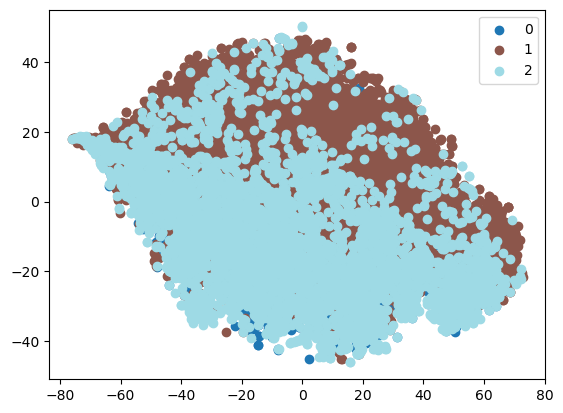

In [106]:
# label_to_color = {'stat.ML': 0, 'cs.CV': 1, 'cs.LG': 2}
class_names = ['stat.ML', 'cs.CV', 'cs.LG']

def plot_docs(emb_vecs_2d: List, labels: List, class_names: List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """
    for i, cn in enumerate(class_names):
        print(f"Title of class {i}: {cn}")

    unique_labels = np.unique(labels)

    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

    fig, ax = plt.subplots()

    for i, label in enumerate(unique_labels):
        emb_vecs_2d_cluster = emb_vecs_2d[labels == label]
        ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], color=colors[i], label=label)

    ax.legend()
    plt.show()

plot_docs(np.array(docs_embedding_2d), Y, class_names)

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Clustering of documents</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this part, you will cluster documents using embedding vectors extracted from the language model with two methods, Kmeans and hierarchical clustering.
</font>
</div>

<div>
<font face="XB Zar" size=4>
    <h3>
    <b>K-means method</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>

In this part, you will first K-means clustering algorithm
<u><b>From the base</b></u>
 You implement and then create document clusters using it. Run the algorithm using several different values ​​of the number of clusters (k). In each run, using a number of documents in each cluster, determine the topic of that cluster and draw the resulting clustering using the two-dimensional vectors from the previous section. By doing this, check your implementation as well as the efficiency of this algorithm in clustering documents and placing similar documents in the same clusters.
<br>
 Draw the silhouette score graph for different values ​​of k and perform silhouette analysis to choose the appropriate k.
 Also plot the purity value for k using the labeled data and report the purity value for the final k.
<br>
Place your implementation in the cluster_kmeans function. This function receives a list of embedding vectors and produces the coordinates of the center of each cluster along with a list of cluster numbers corresponding to each embedding vector.
Note that the algorithm must be implemented from scratch and it is not possible to use ready-made implementations.

</font>
</div>

Title of class 0: Title: dual attention mobdensenet damdnet for robust 3d face alignment. 
Title of class 1: Title: brain tumor detection based on mathematical analysis and symmetry information. 


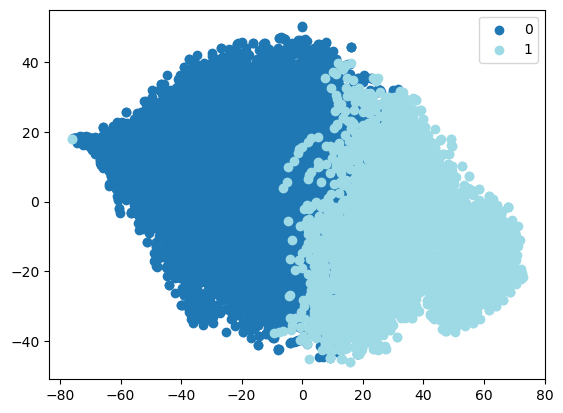

Title of class 0: Title: new approach of improving cfa image for digital camera 's. 
Title of class 1: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 2: Title: dual attention mobdensenet damdnet for robust 3d face alignment. 


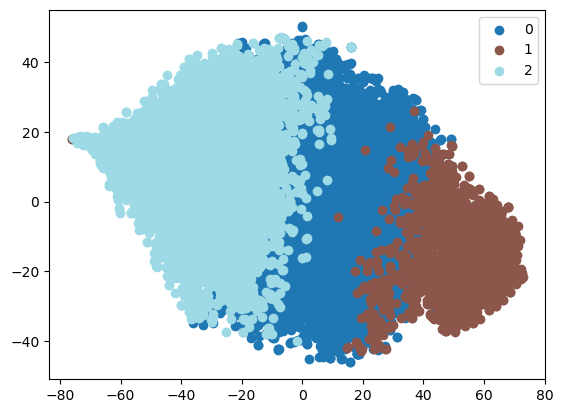

Title of class 0: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 1: Title: new approach of improving cfa image for digital camera 's. 
Title of class 2: Title: augmented random search for quadcopter control an alternative to reinforcement learning. 
Title of class 3: Title: brain tumor detection based on mathematical analysis and symmetry information. 


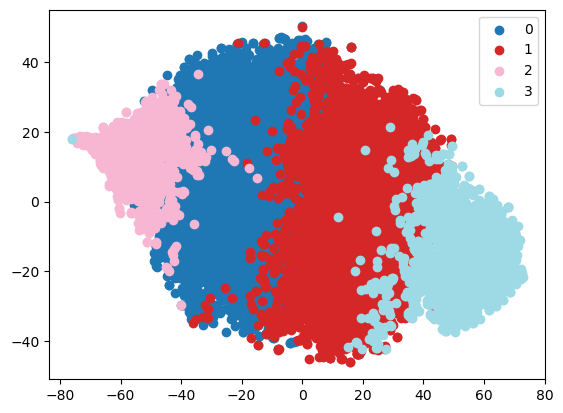

Title of class 0: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 1: Title: estimacion de carga muscular mediante imagenes. 
Title of class 2: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 3: Title: new approach of improving cfa image for digital camera 's. 
Title of class 4: Title: brain tumor detection based on mathematical analysis and symmetry information. 


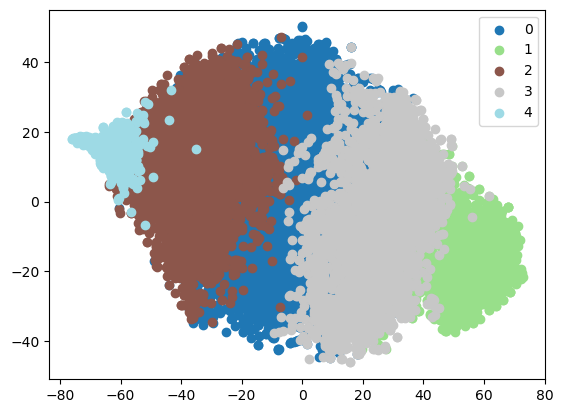

Title of class 0: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 1: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 2: Title: fastmoe fast mixture-of-expert training system. 
Title of class 3: Title: estimacion de carga muscular mediante imagenes. 
Title of class 4: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 5: Title: new approach of improving cfa image for digital camera 's. 


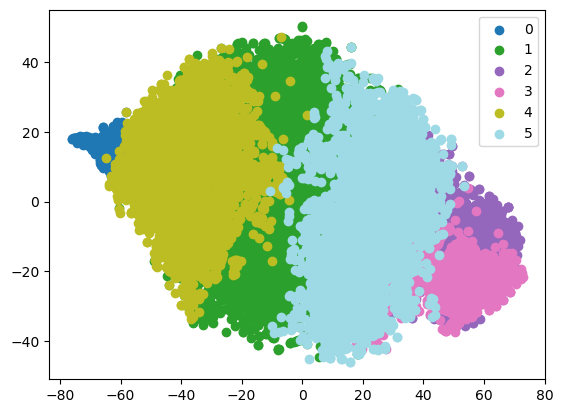

Title of class 0: Title: estimacion de carga muscular mediante imagenes. 
Title of class 1: Title: ae-ot-gan training gans from data specific latent distribution. 
Title of class 2: Title: the high-quality wide multi-channel attack hq-wmca database. 
Title of class 3: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 4: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 5: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 6: Title: sign language recognition generation and translation an interdisciplinary perspective. 


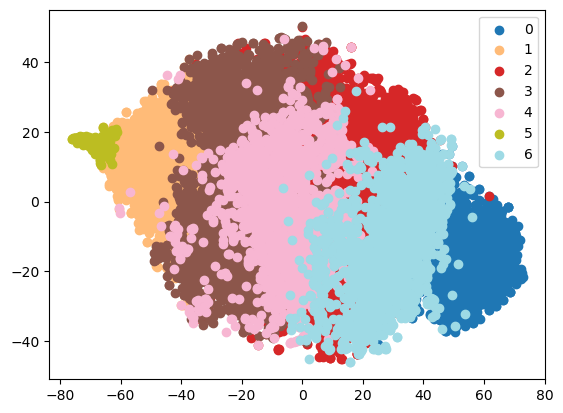

Title of class 0: Title: ae-ot-gan training gans from data specific latent distribution. 
Title of class 1: Title: understanding bandits with graph feedback. 
Title of class 2: Title: estimacion de carga muscular mediante imagenes. 
Title of class 3: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 4: Title: the high-quality wide multi-channel attack hq-wmca database. 
Title of class 5: Title: sign language recognition generation and translation an interdisciplinary perspective. 
Title of class 6: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 7: Title: brain tumor detection based on mathematical analysis and symmetry information. 


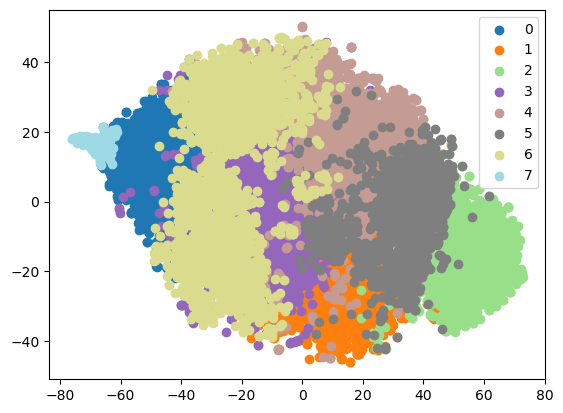

Title of class 0: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 1: Title: new approach of improving cfa image for digital camera 's. 
Title of class 2: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 3: Title: deep learning on graphs survey. 
Title of class 4: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 5: Title: ae-ot-gan training gans from data specific latent distribution. 
Title of class 6: Title: estimacion de carga muscular mediante imagenes. 
Title of class 7: Title: the high-quality wide multi-channel attack hq-wmca database. 
Title of class 8: Title: cropgym reinforcement learning environment for crop management. 


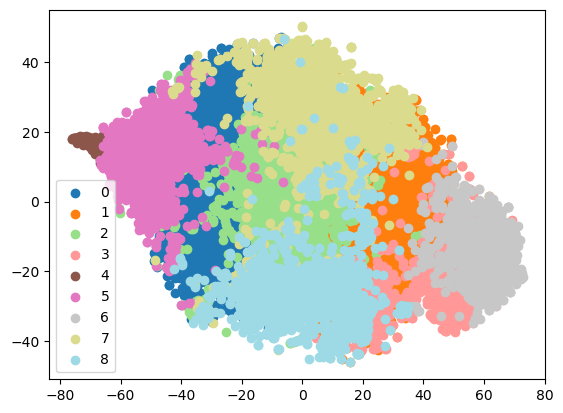

Title of class 0: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 1: Title: fast efficient object detection using selective attention. 
Title of class 2: Title: softmax gan. 
Title of class 3: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 4: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 5: Title: estimacion de carga muscular mediante imagenes. 
Title of class 6: Title: indonesian id card extractor using optical character recognition and natural language post-processing. 
Title of class 7: Title: some insights into lifelong reinforcement learning systems. 
Title of class 8: Title: iris recognition for personal identification using lamstar neural network. 
Title of class 9: Title: the high-quality wide multi-channel attack hq-wmca database. 


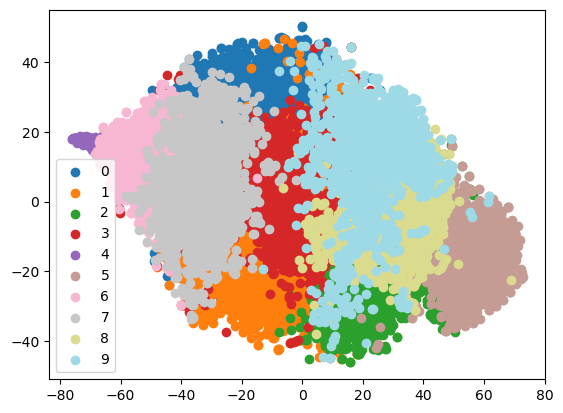

Title of class 0: Title: application of lstm architectures for next frame forecasting in sentinel-1 images time series. 
Title of class 1: Title: creative sketch generation. 
Title of class 2: Title: understanding bandits with graph feedback. 
Title of class 3: Title: brain tumor detection based on mathematical analysis and symmetry information. 
Title of class 4: Title: sign language recognition generation and translation an interdisciplinary perspective. 
Title of class 5: Title: fast efficient object detection using selective attention. 
Title of class 6: Title: estimacion de carga muscular mediante imagenes. 
Title of class 7: Title: indonesian id card extractor using optical character recognition and natural language post-processing. 
Title of class 8: Title: bmvc 2019 workshop on interpretable and explainable machine vision. 
Title of class 9: Title: some insights into lifelong reinforcement learning systems. 
Title of class 10: Title: the high-quality wide multi-channel attack h

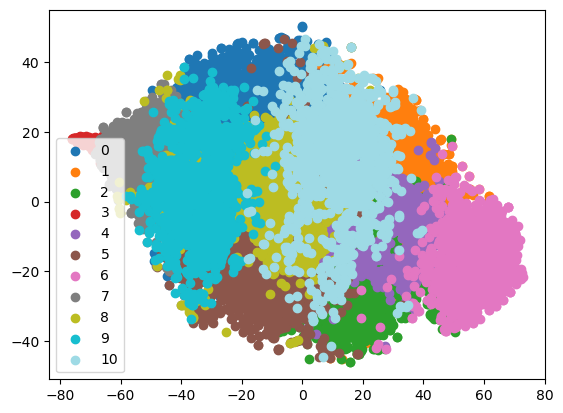

In [119]:
label_to_code = {'stat.ML': 0, 'cs.CV': 1, 'cs.LG': 2}

def find_title_of_cluster(most_nearest_doc_to_center_of_cluster: List[str]):
    """
      return title of the cluster based on most important word in the most nearest docs to the cluster, you can use TFIDF vectorizer
    """
    text_1NN = most_nearest_doc_to_center_of_cluster[0]
    end_title_index = text_1NN.find('Summary')
    return text_1NN[:end_title_index]

def get_k_nearest_doc_to_center(cluster_centers: List[List[float]], docs_embeddings: List[List[float]], cluster_labels: List[int], k: int):
    """ 
      return k indices of most nearest doc to cluster for each cluster 
    """
    num_clusters = len(cluster_centers)
    indices = [[] for _ in range(num_clusters)]

    # Calculate the pairwise distances between cluster centers and document embeddings
    distances = cdist(cluster_centers, docs_embeddings)
    
    for i in range(num_clusters):
        main_indices = [j for j, label in enumerate(cluster_labels) if label == i]
        cluster_distances = distances[i, main_indices]
        cluster_indices = sorted(range(len(cluster_distances)), key=lambda i: cluster_distances[i], reverse=True)[:k]
        main_nearest_indices = [main_indices[i] for i in cluster_indices]
        indices[i] = main_nearest_indices
    
    return indices

def assign_points_to_clusters(emb_vecs: List[List[float]], clusters: List[List[float]]) -> List[int]:
    distances = np.sqrt(((emb_vecs - clusters[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def cluster_kmeans(emb_vecs: List[List[float]], n_clusters: int, MAX_ITER=100) -> List[List[float]]:
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    emb_vecs = np.array(emb_vecs)
    centroids = emb_vecs[np.random.choice(emb_vecs.shape[0], n_clusters, replace=False)]

    cluster_labels = []
    cluster_labels = assign_points_to_clusters(emb_vecs, centroids)
    
    for j in range(MAX_ITER):
# Chunk Based:
#         chunk_size = 256
#         for i in range(0, len(emb_vecs), chunk_size):
            
#             for j in range(n_clusters):
#                 centroids[j] = emb_vecs[cluster_labels == j].mean(axis=0)
            
#             chunk = emb_vecs[i:i+chunk_size]
#             cluster_labels[i:i+chunk_size] = assign_points_to_clusters(chunk, centroids)
            for j in range(n_clusters):
                centroids[j] = emb_vecs[cluster_labels == j].mean(axis=0)
            
            cluster_labels = assign_points_to_clusters(emb_vecs, centroids)
            
    return centroids, cluster_labels

k_values = range(2, 12)
silhouette_scores = []
purity_scores = []

cluster_centers, cluster_labels = [], []
for k in k_values:
    cluster_center, cluster_labels = cluster_kmeans(np.array(docs_embedding), k)

    indices = get_k_nearest_doc_to_center(cluster_center, docs_embedding, cluster_labels, 1)

    indices = [[X[index] for index in one_cluster_indices] for one_cluster_indices in indices]

    class_names = [find_title_of_cluster(cluster_docs) for i, cluster_docs in enumerate(indices)]
    
    plot_docs(np.array(docs_embedding_2d), cluster_labels, class_names)

    silhouette_avg = silhouette_score(docs_embedding, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    confusion_mat = confusion_matrix(Y, cluster_labels)
    purity = np.sum(np.amax(confusion_mat, axis=0)) / np.sum(confusion_mat)
    purity_scores.append(purity)

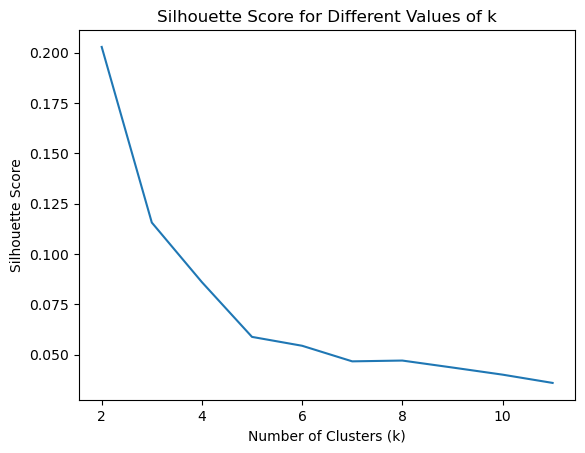

In [121]:
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

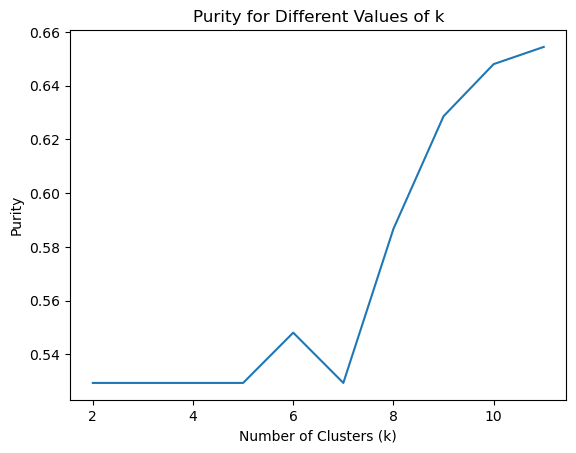

In [122]:
plt.plot(k_values, purity_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Purity')
plt.title('Purity for Different Values of k')
plt.show()

<div>
<font face="XB Zar" size=4>
    <h3>
    <b>Hierarchical Clustering</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
Hierarchical clustering technique is one of the clustering techniques in machine learning. In this section, you can use the scipy library or any other Python library to cluster the data hierarchically. You can then visualize the clusters with matplotlib.
</font>
</div>

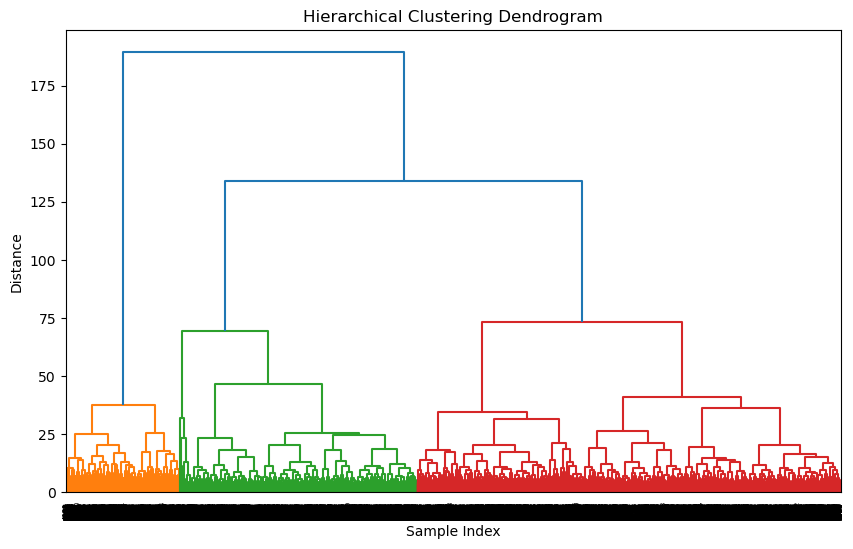

In [126]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(docs_embedding, method='ward')

plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Clustering of search system outputs phase 1</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this part, you will add the clustering feature in the search system that you developed in phase 1 of the lesson. For this purpose, you add the functions you have already implemented to your phase 1 search system in a way that clusters the output documents of the system and specifies the documents that are in the same cluster in the output display.
You can do this by calling the functions you implemented in phase 1 and making changes to them in the cell below. How you implement this part is up to you.
</font>
</div>

In [26]:
def cluster_kmeans(emb_vecs : List, n_clusters : int, MAX_ITER=200):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    emb_vecs = np.array(emb_vecs)
    centroids = emb_vecs[np.random.choice(emb_vecs.shape[0], n_clusters, replace=False)]

    for i in range(MAX_ITER):
        distances = np.sqrt(((emb_vecs - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        for j in range(n_clusters):
            centroids[j] = emb_vecs[labels == j].mean(axis=0)

    return centroids, labels

In [49]:
title_query="computer vision and VIT models and encoder decoder"
summary_query="I love computer vision and VIT models and encoder decoder "

top_documents_id, _ = searchEngine.search(title_query, summary_query, method="okapi_bm25", category="all", print_=False, max_result_count=30)
top_documents_id = [doc_id for doc_id in top_documents_id if doc_id < 10000]

embedded_output_docs = np.array(docs_embedding)[top_documents_id]
CLUSTER_NUMS = 3
centroids, cluster_labels = cluster_kmeans(embedded_output_docs, CLUSTER_NUMS)

snippet = searchEngine.snippet_output(top_documents_id, title_query, summary_query, print_=True, manual_class=cluster_labels)


Doc 10855 Class cs.LG :
Title: Vision Transformer with Progressive Sampling 
Summary: Transformers with powerful global relation modeling abilities have been
introduced to fundamental co ... 

Doc 11677 Class stat.ML :
Title: Emerging Properties in Self-Supervised Vision Transformers 
Summary: In this paper, we question if self-supervised learning provides new
properties to Vision Transformer ... 

Doc 11721 Class cs.CV :
Title: Vision Transformers are Robust Learners 
Summary: Transformers, composed of multiple self-attention layers, hold strong
promises toward a generic lear ... 

Doc 11196 Class cs.CV :
Title: Exploring Vision Transformers for Fine-grained Classification 
Summary: Existing computer vision research in categorization struggles with
fine-grained attributes recogniti ... 

Doc 32 Class stat.ML :
Title: Fully Transformer Networks for Semantic Image Segmentation 
Summary: Transformers have shown impressive performance in various natural language
processing and computer v 

<div>
<font face="XB Zar" size=5>
    <h2>
    <b>Search for documents similar to a document</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
In this part, you will implement the find_similar_docs function, where by receiving the index of a document in the dataset, the number of similar documents and the list of embedding vectors, it produces the index of documents similar to it in the dataset in the output. For this purpose, you find num_of_similar_docs to the closest vectors to the desired vector and return their index as output. Similar documents should be sorted in order of similarity (the similarity value of their embedding vector to the embedding vector of the input document). It is up to you to choose the similarity measure.
</font>
</div>

In [62]:
from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """
    input_emb_vec = docs_embedding[input_doc_index]
    distances = [np.linalg.norm(input_emb_vec - emb_vec) for emb_vec in emb_vecs]
    sorted_indexes = sorted(range(len(distances)), key=lambda i: distances[i])
    return sorted_indexes[1:num_of_similar_docs+1] # First item is itself
    
print(find_similar_docs(11, 5, docs_embedding))

[7368, 4692, 5948, 7459, 6197]
